
# Importing neccessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
import scipy.stats as stats

In [5]:
from pycaret.regression import *

In [6]:
train = pd.read_csv("E:/00-Data Science and Data Analysis/ML Projects/02-House Prices - Advanced Regression Techniques/dataset/train.csv")
test = pd.read_csv("E:/00-Data Science and Data Analysis/ML Projects/02-House Prices - Advanced Regression Techniques/dataset/test.csv")
submission_sample = pd.read_csv("E:/00-Data Science and Data Analysis/ML Projects/02-House Prices - Advanced Regression Techniques/dataset/sample_submission.csv")

In [7]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


concatenating train and test data frame into one data frame to perform data cleaning ((column wise)) to both data frames once so the data cleaning process would be the same for both data frames

In [9]:
data = pd.concat([train.drop(train.columns[[0,-1]],axis=1),test.drop(test.columns[0],axis=1)],axis = 0)

In [10]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [11]:
data.reset_index(inplace=True,drop=True)

In [12]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


#### Manualy searching for numeric columns

In [13]:
numerical_columns_lst ='LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal'.split(',')

In [14]:
len(numerical_columns_lst)

33

#### from the text file we specify and collect the categorical features in the list below

In [15]:
categorical_columns_lst = 'MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition'.split(',')

In [16]:
len(categorical_columns_lst)

46

#### from the text file we specify and collect the features that have 'na' or 'none' as a category in them in the list below

In [17]:
na_categories_lst = 'Alley,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,MasVnrType'.split(',')
len(na_categories_lst)

15

In [18]:
non_na_categories = list(set(categorical_columns_lst) - set(na_categories_lst))

In [19]:
len(non_na_categories)

31

In [20]:
for cat in na_categories_lst:
    print(cat,':',data[cat].isna().sum())

Alley : 2721
BsmtQual : 81
BsmtCond : 82
BsmtExposure : 82
BsmtFinType1 : 79
BsmtFinType2 : 80
FireplaceQu : 1420
GarageType : 157
GarageFinish : 159
GarageQual : 159
GarageCond : 159
PoolQC : 2909
Fence : 2348
MiscFeature : 2814
MasVnrType : 24


#### Filling the na values in the non-na categorical columns

In [21]:
for cat in non_na_categories:
    print(cat , ' : ',data[cat].isna().sum())

RoofStyle  :  0
Condition1  :  0
HeatingQC  :  0
HouseStyle  :  0
MoSold  :  0
YrSold  :  0
Foundation  :  0
ExterCond  :  0
Condition2  :  0
PavedDrive  :  0
Utilities  :  2
ExterQual  :  0
CentralAir  :  0
Exterior1st  :  1
LandContour  :  0
Electrical  :  1
Street  :  0
SaleType  :  1
Exterior2nd  :  1
MSZoning  :  4
LandSlope  :  0
LotConfig  :  0
Neighborhood  :  0
RoofMatl  :  0
LotShape  :  0
Heating  :  0
SaleCondition  :  0
KitchenQual  :  1
Functional  :  2
BldgType  :  0
MSSubClass  :  0


#### filling the na values with the mode of each column

In [22]:
for cat in non_na_categories:
    data[cat] = data[cat].fillna(data[cat].mode()[0])

In [23]:
for cat in non_na_categories:
    print(cat , ' : ',data[cat].isna().sum())

RoofStyle  :  0
Condition1  :  0
HeatingQC  :  0
HouseStyle  :  0
MoSold  :  0
YrSold  :  0
Foundation  :  0
ExterCond  :  0
Condition2  :  0
PavedDrive  :  0
Utilities  :  0
ExterQual  :  0
CentralAir  :  0
Exterior1st  :  0
LandContour  :  0
Electrical  :  0
Street  :  0
SaleType  :  0
Exterior2nd  :  0
MSZoning  :  0
LandSlope  :  0
LotConfig  :  0
Neighborhood  :  0
RoofMatl  :  0
LotShape  :  0
Heating  :  0
SaleCondition  :  0
KitchenQual  :  0
Functional  :  0
BldgType  :  0
MSSubClass  :  0


##### Now that all na values in the non_na_categorical columns have been filled with the proper values, we will start working on the other categorical columns without na as a category

##### developing a dataframe for the categrical columns with:
#### total number of categories per feature
#### no of na values in each feature
#### is this feature an na_categorical_column

In [24]:
num_cat = []
num_na = []
na_cat = []
for cat in categorical_columns_lst:
    # num_cat will be a list including the number of categories in the data data frame for each cat column/feature
    # within the dataframe
    num_cat.append(len(data[cat].unique()))
    #num_na will be a list including the number of na values within each coulm/feature in the categorical features in
    #the data dataframe
    num_na.append(data[cat].isna().sum())
    # na_cat will be a list zeros and ones where 0 corresponds to a non_na_category and 1 corresponsd to an na_category
    if cat in na_categories_lst:
        na_cat.append(1)
    else:
        na_cat.append(0)

In [25]:
cat_num = pd.DataFrame(data={'num_categoreis':num_cat,'num_na':num_na,'na_cat':na_cat},index=categorical_columns_lst)

In [26]:
cat_num

,num_categoreis,num_na,na_cat
MSSubClass,16,0,0
MSZoning,5,0,0
Street,2,0,0
Alley,3,2721,1
LotShape,4,0,0
LandContour,4,0,0
Utilities,2,0,0
LotConfig,5,0,0
LandSlope,3,0,0
Neighborhood,25,0,0


In [27]:
cat_num.sum()

num_categoreis      300
num_na            13274
na_cat               15
dtype: int64

In [28]:
data[categorical_columns_lst].head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,2,2008,WD,Normal
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,5,2007,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,9,2008,WD,Normal
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,2,2006,WD,Abnorml
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,12,2008,WD,Normal


#### Filling the na values in the numerical columns

<AxesSubplot:>

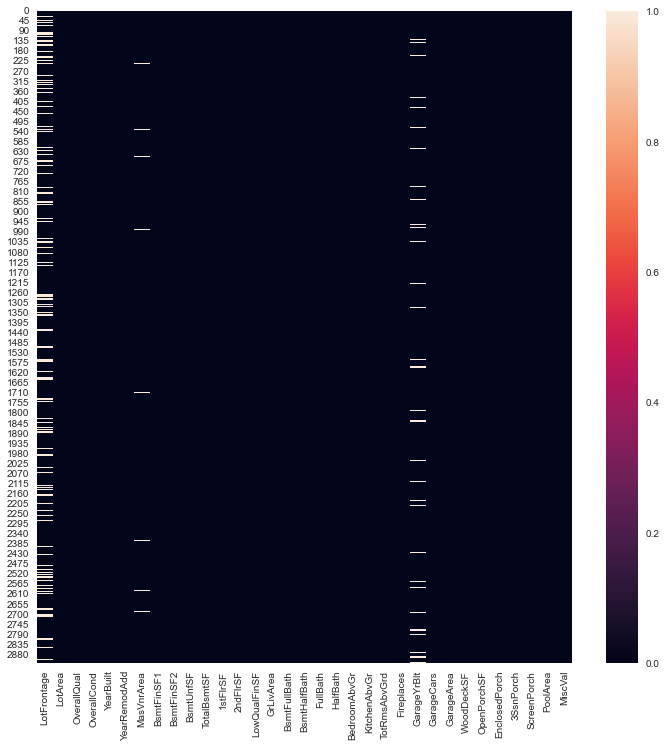

In [29]:
plt.figure(figsize=(12,12))
sns.heatmap(data[numerical_columns_lst].isna())

In [30]:
for cat in numerical_columns_lst:
    if data[cat].isna().sum() > 0 :
        print(cat, ' : ', data[cat].isna().sum())

LotFrontage  :  486
MasVnrArea  :  23
BsmtFinSF1  :  1
BsmtFinSF2  :  1
BsmtUnfSF  :  1
TotalBsmtSF  :  1
BsmtFullBath  :  2
BsmtHalfBath  :  2
GarageYrBlt  :  159
GarageCars  :  1
GarageArea  :  1


#### for numeric features related to basement above where na value is present we will fill it with 0

In [31]:
data[data['BsmtFinSF1'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml


In [32]:
data.loc[data['BsmtFullBath'].isna(),['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']]

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
2120,NaN,NaN,NaN,NaN,NaN,NaN
2188,0.0,0.0,0.0,0.0,NaN,NaN


In [33]:
data.loc[data['BsmtFullBath'].isna(),['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']]= data.loc[data['BsmtFullBath'].isna(),['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']].fillna(0)

In [34]:
data.iloc[[2120,2188]][['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']]

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
2120,0.0,0.0,0.0,0.0,0.0,0.0
2188,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
for cat in numerical_columns_lst:
    if data[cat].isna().sum() > 0 :
        print(cat, ' : ', data[cat].isna().sum())

LotFrontage  :  486
MasVnrArea  :  23
GarageYrBlt  :  159
GarageCars  :  1
GarageArea  :  1


In [36]:
garage = ['GarageType','GarageFinish','GarageYrBlt','GarageCars','GarageArea','GarageQual','GarageCond']

#### For features related to garage

In [37]:
data[garage].head()

,GarageType,GarageFinish,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond
0,Attchd,RFn,2003.0,2.0,548.0,TA,TA
1,Attchd,RFn,1976.0,2.0,460.0,TA,TA
2,Attchd,RFn,2001.0,2.0,608.0,TA,TA
3,Detchd,Unf,1998.0,3.0,642.0,TA,TA
4,Attchd,RFn,2000.0,3.0,836.0,TA,TA


In [38]:
# checking the total number of na values in garage related columns
data[garage].isna().sum()

GarageType      157
GarageFinish    159
GarageYrBlt     159
GarageCars        1
GarageArea        1
GarageQual      159
GarageCond      159
dtype: int64

#### for na values in the part of the Data frame above we will fill the na values as follows:
#### na values in GarageYrBlt shall be filled with 0 as the concerned houses do not have garages to begin with
#### na values in GarageType, GarageFinish, GarageQual, GarageCond shall be filled with 'None'
#### na values in GarageArea and GarageCars shall be checked individually since it occurs only once for both,, we could even delete 
#### the rows

In [39]:
# checking rows where the GarageType feature is na

In [40]:
data.loc[data.GarageType.isna(),garage].head()

,GarageType,GarageFinish,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,NaN,NaN,0.0,0.0,NaN,NaN
48,NaN,NaN,NaN,0.0,0.0,NaN,NaN
78,NaN,NaN,NaN,0.0,0.0,NaN,NaN
88,NaN,NaN,NaN,0.0,0.0,NaN,NaN
89,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [41]:
# the sums above show equal numbers of na values in most columns which means that these houses have no garages so we can fill 
# with 'None' in the categorical features ['GarageType','GarageFinish','GarageQual','GarageCond']
# and 0 in the numerical features

In [42]:
data.loc[data.GarageType.isna(),['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']] = data.loc[data.GarageType.isna(),['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']].fillna('None')

In [43]:
data.loc[data.GarageType.isna(),garage].isna().sum()

GarageType      0.0
GarageFinish    0.0
GarageYrBlt     0.0
GarageCars      0.0
GarageArea      0.0
GarageQual      0.0
GarageCond      0.0
dtype: float64

In [44]:
# now let's check the rows where the GarageYrBlt feature is na

In [45]:
data.loc[data.GarageYrBlt.isna(),garage].isna().sum()

GarageType        0
GarageFinish      2
GarageYrBlt     159
GarageCars        1
GarageArea        1
GarageQual        2
GarageCond        2
dtype: int64

In [46]:
# now let's check the two rows where the GarageFinish feature is na

In [47]:
data[data.GarageFinish.isna()][garage].isna().sum()

GarageType      0
GarageFinish    2
GarageYrBlt     2
GarageCars      1
GarageArea      1
GarageQual      2
GarageCond      2
dtype: int64

In [48]:
data.loc[data.GarageFinish.isna(),garage]

,GarageType,GarageFinish,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond
2126,Detchd,NaN,NaN,1.0,360.0,NaN,NaN
2576,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
# the first house above has a garage but but the second does not seem to have a garage but we will fill both rows with the mode
# values for each column

In [50]:
# we will leave the GarageFinish feature to be the last to fill since the na values in it are the way to identify these two rows
# we will start with GarageQual and GarageCond

In [51]:
data[data.GarageType =='Detchd'].GarageQual.mode()[0]

'TA'

In [52]:
data[data.GarageType =='Detchd'].GarageCond.mode()[0]

'TA'

In [53]:
data.loc[data.GarageFinish.isna(),['GarageQual']] = data.loc[data.GarageFinish.isna(),['GarageQual']].fillna(data[data.GarageType =='Detchd'].GarageQual.mode()[0])

In [54]:
data.loc[data.GarageFinish.isna(),['GarageCond']] = data.loc[data.GarageFinish.isna(),['GarageCond']].fillna(data[data.GarageType =='Detchd'].GarageCond.mode()[0])

In [55]:
#checking the two rows to see if the na values above have been filled preperly

In [56]:
data.loc[data.GarageFinish.isna(),garage]

,GarageType,GarageFinish,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond
2126,Detchd,NaN,NaN,1.0,360.0,TA,TA
2576,Detchd,NaN,NaN,NaN,NaN,TA,TA


In [57]:
# now we fill GarageArea, GarageCars, and GaraeYrBlt with the mode values for the detahced garages

In [58]:
data[data.GarageType =='Detchd'].GarageCars.mode()[0]

2.0

In [59]:
data[data.GarageType =='Detchd'].GarageArea.mode()[0]

576.0

In [60]:
data[data.GarageType =='Detchd'].GarageYrBlt.mode()[0]

1950.0

In [61]:
data.loc[data.GarageFinish.isna(),['GarageCars']] = data.loc[data.GarageFinish.isna(),['GarageCars']].fillna(data[data.GarageType =='Detchd'].GarageCars.mode()[0])
data.loc[data.GarageFinish.isna(),['GarageArea']] = data.loc[data.GarageFinish.isna(),['GarageArea']].fillna(data[data.GarageType =='Detchd'].GarageArea.mode()[0])
data.loc[data.GarageFinish.isna(),['GarageYrBlt']] = data.loc[data.GarageFinish.isna(),['GarageYrBlt']].fillna(data[data.GarageType =='Detchd'].GarageYrBlt.mode()[0])

In [62]:
data.loc[data.GarageFinish.isna(),garage]

,GarageType,GarageFinish,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond
2126,Detchd,NaN,1950.0,1.0,360.0,TA,TA
2576,Detchd,NaN,1950.0,2.0,576.0,TA,TA


In [63]:
#Now we fill GarageFinish with the mode value

In [64]:
data[data.GarageType =='Detchd'].GarageFinish.mode()[0]

'Unf'

In [65]:
data.GarageFinish = data.GarageFinish.fillna(data[data.GarageType =='Detchd'].GarageFinish.mode()[0])

In [66]:
data.iloc[[2126,2576]][garage]

,GarageType,GarageFinish,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond
2126,Detchd,Unf,1950.0,1.0,360.0,TA,TA
2576,Detchd,Unf,1950.0,2.0,576.0,TA,TA


In [67]:
data[garage].isna().sum()

GarageType        0
GarageFinish      0
GarageYrBlt     157
GarageCars        0
GarageArea        0
GarageQual        0
GarageCond        0
dtype: int64

In [68]:
#Now we check rows where the YrBlt is na to make sure the houses have no garages

In [69]:
data[data['GarageYrBlt'].isna()][garage]

,GarageType,GarageFinish,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond
39,None,None,NaN,0.0,0.0,None,None
48,None,None,NaN,0.0,0.0,None,None
78,None,None,NaN,0.0,0.0,None,None
88,None,None,NaN,0.0,0.0,None,None
89,None,None,NaN,0.0,0.0,None,None
99,None,None,NaN,0.0,0.0,None,None
108,None,None,NaN,0.0,0.0,None,None
125,None,None,NaN,0.0,0.0,None,None
127,None,None,NaN,0.0,0.0,None,None
140,None,None,NaN,0.0,0.0,None,None


In [70]:
# yes.. all houses have no garages so we fill these na values with zero

In [71]:
data.GarageYrBlt.fillna(0,inplace = True)

In [72]:
data[data['GarageYrBlt'].isna()][garage]

,GarageType,GarageFinish,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond


In [73]:
#now all na values related to garages have been filled properly, we go beck to checkin gthe rest of the coulmns

In [74]:
for cat in numerical_columns_lst:
    if data[cat].isna().sum() > 0 :
        print(cat, ' : ', data[cat].isna().sum())

LotFrontage  :  486
MasVnrArea  :  23


In [75]:
# we check the Masonry veneer columns

In [76]:
data[data['MasVnrArea'].isna()][['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN
1691,NaN,NaN
1706,NaN,NaN


In [77]:
data.MasVnrType.isna().sum()

24

In [78]:
# we will fill the na values in the 23 rows above in the MasVnrType column with 'none'
# there will be a reamining row where we will separetly check

In [79]:
data.loc[data.MasVnrArea.isna(),['MasVnrType']] = data.loc[data.MasVnrArea.isna(),['MasVnrType']].fillna('None')

In [80]:
data.loc[data.MasVnrArea.isna(),['MasVnrType']]

,MasVnrType
234,None
529,None
650,None
936,None
973,None
977,None
1243,None
1278,None
1691,None
1706,None


In [81]:
#Now we fill the na values in the MasVnrArea with 0

In [82]:
data.MasVnrArea.fillna(0,inplace = True)

In [83]:
data.MasVnrArea.isna().sum()

0

In [84]:
data.MasVnrType.isna().sum()

1

In [85]:
data.loc[data.MasVnrType.isna(),['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
2610,NaN,198.0


In [86]:
data.MasVnrType.value_counts().index[1]

'BrkFace'

In [87]:
data.MasVnrType.fillna(data.MasVnrType.value_counts().index[1],inplace = True)

In [88]:
data.MasVnrType.isna().sum()

0

In [89]:
for cat in numerical_columns_lst:
    if data[cat].isna().sum() >0:
        print(cat, ' : ', data[cat].isna().sum())

LotFrontage  :  486


In [90]:
# We will the missing values in this column using KNn regression, meaning to impute the na values as closest to its
# similar incidents

In [91]:
data[['LotFrontage']].describe()

,LotFrontage
count,2433.000000
mean,69.305795
std,23.344905
min,21.000000
25%,59.000000
50%,68.000000
75%,80.000000
max,313.000000


In [92]:
data[numerical_columns_lst].loc[data['LotFrontage'].notna(),:].drop('LotFrontage',axis=1)

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0
1,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0
2,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0
3,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0
4,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,0.0,0.0,0.0,0,0,0,0,0,0,0
2915,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1970.0,1.0,286.0,0,24,0,0,0,0,0
2916,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,1224.0,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,1960.0,2.0,576.0,474,0,0,0,0,0,0
2917,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,0.0,0.0,0.0,80,32,0,0,0,0,700


In [93]:
lf_Xtrain = data[numerical_columns_lst].loc[data['LotFrontage'].notna(),:].drop('LotFrontage',axis=1)

In [94]:
data[numerical_columns_lst].loc[data['LotFrontage'].notna(),:]['LotFrontage']

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
        ...  
2914     21.0
2915     21.0
2916    160.0
2917     62.0
2918     74.0
Name: LotFrontage, Length: 2433, dtype: float64

In [95]:
lf_Ytrain = data[numerical_columns_lst].loc[data['LotFrontage'].notna(),:]['LotFrontage']

In [96]:
data[numerical_columns_lst].loc[data['LotFrontage'].isna(),:].drop('LotFrontage',axis=1)

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
7,10382,7,6,1973,1973,240.0,859.0,32.0,216.0,1107.0,1107,983,0,2090,1.0,0.0,2,1,3,1,7,2,1973.0,2.0,484.0,235,204,228,0,0,0,350
12,12968,5,6,1962,1962,0.0,737.0,0.0,175.0,912.0,912,0,0,912,1.0,0.0,1,0,2,1,4,0,1962.0,1.0,352.0,140,0,0,0,176,0,0
14,10920,6,5,1960,1960,212.0,733.0,0.0,520.0,1253.0,1253,0,0,1253,1.0,0.0,1,1,2,1,5,1,1960.0,1.0,352.0,0,213,176,0,0,0,0
16,11241,6,7,1970,1970,180.0,578.0,0.0,426.0,1004.0,1004,0,0,1004,1.0,0.0,1,0,2,1,5,1,1970.0,2.0,480.0,0,0,0,0,0,0,700
24,8246,5,8,1968,2001,0.0,188.0,668.0,204.0,1060.0,1060,0,0,1060,1.0,0.0,1,0,3,1,6,1,1968.0,1.0,270.0,406,90,0,0,0,0,0
31,8544,5,6,1966,2006,0.0,0.0,0.0,1228.0,1228.0,1228,0,0,1228,0.0,0.0,1,1,3,1,6,0,1966.0,1.0,271.0,0,65,0,0,0,0,0
42,9180,5,7,1983,1983,0.0,747.0,93.0,0.0,840.0,884,0,0,884,1.0,0.0,1,0,2,1,5,0,1983.0,2.0,504.0,240,0,0,0,0,0,0
43,9200,5,6,1975,1980,0.0,280.0,491.0,167.0,938.0,938,0,0,938,1.0,0.0,1,0,3,1,5,0,1977.0,1.0,308.0,145,0,0,0,0,0,0
50,13869,6,6,1997,1997,0.0,182.0,0.0,612.0,794.0,794,676,0,1470,0.0,1.0,2,0,3,1,6,0,1997.0,2.0,388.0,0,75,0,0,0,0,0
64,9375,7,5,1997,1998,573.0,739.0,0.0,318.0,1057.0,1057,977,0,2034,1.0,0.0,2,1,3,1,8,0,1998.0,2.0,645.0,576,36,0,0,0,0,0


In [97]:
data[numerical_columns_lst].loc[data['LotFrontage'].isna(),:].drop('LotFrontage',axis=1).shape

(486, 32)

In [98]:
lf_Xtest = data[numerical_columns_lst].loc[data['LotFrontage'].isna(),:].drop('LotFrontage',axis=1)

In [99]:
data.loc[data['LotFrontage'].isna(),:]['LotFrontage'].index

Int64Index([   7,   12,   14,   16,   24,   31,   42,   43,   50,   64,
            ...
            2814, 2815, 2818, 2839, 2845, 2847, 2850, 2900, 2901, 2908],
           dtype='int64', length=486)

In [100]:
from sklearn.neighbors import KNeighborsRegressor

In [101]:
knr = KNeighborsRegressor()

In [102]:
knr.fit(lf_Xtrain, lf_Ytrain)

KNeighborsRegressor()

In [103]:
knr.predict(lf_Xtest)

array([ 76.8,  80. ,  82.2,  89.8,  64.8,  71. ,  70.6,  75.4,  75.4,
        78. ,  67.6,  59.8,  64. ,  73.4,  74. ,  74.6,  66.4,  93.4,
        85.2, 105. ,  44.2,  60.8,  59. ,  79.4,  74.6,  51. ,  83.6,
        84.6,  92. ,  72.2,  83.4,  74.6,  83. ,  24. ,  75.8,  65. ,
        36.2,  73.6,  90.4,  69.2,  74.4,  65. ,  72.4,  66.6,  66.4,
       124.8,  64. ,  58.6,  82.6,  81. ,  62.6,  70.8,  66.4, 110. ,
        76. ,  77.8, 124.8,  59.8,  73. ,  82.4,  36.6,  76.6,  65.8,
        68.6, 112.6,  82.6,  74.6,  62.2,  63.4,  68.4,  57.8,  61.6,
        68.2,  79.4,  41.8, 108.8,  70.6,  78.6,  61.8,  68.4,  61. ,
        58.4,  43. ,  65.4,  62.4,  33.2,  98.6,  85. ,  63. ,  88.4,
        74.2,  80.6,  76.2,  74.6,  94. ,  44. ,  88.2, 102. ,  63.2,
        70.4,  36.2,  82.2,  78.6,  81.6,  65.6,  24. ,  94.8,  68.4,
        70.6,  73.4, 113.4, 110.8,  91. ,  68.8,  38.4,  47.4,  52.6,
        36.2, 108.4,  60.2,  74.2,  45. ,  36.2, 103.8,  65.2,  80. ,
        72.4,  59.4,

In [104]:
data.loc[data['LotFrontage'].isna(),'LotFrontage'] = knr.predict(lf_Xtest)

In [105]:
data['LotFrontage'].isna().sum()

0

In [106]:
data[['LotFrontage']].describe()

,LotFrontage
count,2919.000000
mean,70.014868
std,22.622063
min,21.000000
25%,60.000000
50%,70.000000
75%,80.000000
max,313.000000


In [107]:
# Now all the columns in the numerical_col list have been deat with 
# we will cleaning the categorical column list

In [108]:
for cat in categorical_columns_lst:
    if data[cat].isna().sum() >0:
        print(cat, ' : ', data[cat].isna().sum())

Alley  :  2721
BsmtQual  :  81
BsmtCond  :  82
BsmtExposure  :  82
BsmtFinType1  :  79
BsmtFinType2  :  80
FireplaceQu  :  1420
PoolQC  :  2909
Fence  :  2348
MiscFeature  :  2814


In [109]:
# filling the na values in the Alley column with 'None' since it is a considered category in the datat description 
# But this assumption is dangerous since there are alot of na  values in this specific column

In [110]:
data['Alley'].fillna('None',inplace = True)

In [111]:
# to fill the na values of FirePlaceQu column we check if no of houses with 0 fire places is almost equal to the number of na values
# in the FirePlaceQu column so we can fill na with 'None'

In [112]:
data['Fireplaces'].value_counts()

0    1420
1    1268
2     219
3      11
4       1
Name: Fireplaces, dtype: int64

In [113]:
data['FireplaceQu'].fillna('None',inplace = True)

In [114]:
for cat in categorical_columns_lst:
    if data[cat].isna().sum() >0:
        print(cat, ' : ', data[cat].isna().sum())

BsmtQual  :  81
BsmtCond  :  82
BsmtExposure  :  82
BsmtFinType1  :  79
BsmtFinType2  :  80
PoolQC  :  2909
Fence  :  2348
MiscFeature  :  2814


In [115]:
# to fill the na values of PoolQC column we check if no of houses with Pool Area = 0 is almost equal to the number of na values
# in the PoolQC column so we can fillna withj 'None'

In [116]:
data['PoolArea'].value_counts()

0      2906
512       1
648       1
576       1
555       1
480       1
519       1
738       1
144       1
368       1
444       1
228       1
561       1
800       1
Name: PoolArea, dtype: int64

In [117]:
# we fill 2906 na values in the PoolQc column with a corresponding pool area = 0 with 'None'
# we will check the remaing three na values separately

In [118]:
data.loc[data['PoolArea'] ==0,['PoolQC','PoolArea']]

,PoolQC,PoolArea
0,NaN,0
1,NaN,0
2,NaN,0
3,NaN,0
4,NaN,0
...,...,...
2914,NaN,0
2915,NaN,0
2916,NaN,0
2917,NaN,0


In [119]:
data.loc[data['PoolArea'] ==0,['PoolQC']] = data.loc[data['PoolArea'] ==0,['PoolQC']].fillna('None')

In [120]:
data['PoolQC'].isna().sum()

3

In [121]:
data.loc[data.PoolQC.isna(),['PoolQC','PoolArea']]

,PoolQC,PoolArea
2420,NaN,368
2503,NaN,444
2599,NaN,561


In [122]:
data.PoolQC.value_counts()

None    2906
Ex         4
Gd         4
Fa         2
Name: PoolQC, dtype: int64

In [123]:
data.PoolQC.value_counts().index[1]

'Ex'

In [124]:
data.PoolQC.fillna(data.PoolQC.value_counts().index[1],inplace = True)

In [125]:
data[['PoolQC','PoolArea']].isna().sum()

PoolQC      0
PoolArea    0
dtype: int64

In [126]:
# we fillna values in the Fence column with 'None' since none is a defined category

In [127]:
data['Fence'].fillna('None',inplace = True)

In [128]:
for cat in categorical_columns_lst:
    if data[cat].isna().sum() >0:
        print(cat, ' : ', data[cat].isna().sum())

BsmtQual  :  81
BsmtCond  :  82
BsmtExposure  :  82
BsmtFinType1  :  79
BsmtFinType2  :  80
MiscFeature  :  2814


In [129]:
# number of na values are not equal across the basement columns while they should be equal if the same houses have no basement

In [130]:
data.loc[data.BsmtFinType1.isna(),['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
17,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
39,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
90,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
102,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
156,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
182,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
259,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
342,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
362,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
371,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
data.loc[data.BsmtFinType1.isna(),['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']].isna().sum()

BsmtQual        79
BsmtCond        79
BsmtExposure    79
BsmtFinType1    79
BsmtFinType2    79
dtype: int64

In [132]:
# we will all the na values above with 'None'

In [133]:
data.loc[data.BsmtFinType1.isna(),['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']] = data.loc[data.BsmtFinType1.isna(),['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']].fillna('None')

In [134]:
data.loc[data.BsmtFinType1.isna(),['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']].isna().sum()

BsmtQual        0.0
BsmtCond        0.0
BsmtExposure    0.0
BsmtFinType1    0.0
BsmtFinType2    0.0
dtype: float64

In [135]:
# we will check the remaining na values in the Basement features separately

In [136]:
for cat in categorical_columns_lst:
    if data[cat].isna().sum() >0:
        print(cat, ' : ', data[cat].isna().sum())

BsmtQual  :  2
BsmtCond  :  3
BsmtExposure  :  3
BsmtFinType2  :  1
MiscFeature  :  2814


In [137]:
data.loc[data.BsmtCond.isna(),['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
2040,Gd,NaN,Mn,GLQ,Rec
2185,TA,NaN,No,BLQ,Unf
2524,TA,NaN,Av,ALQ,Unf


In [138]:
# we will fill the na values in the BSMTCond with the mode of the column

In [139]:
data.BsmtCond.value_counts()

TA      2606
Gd       122
Fa       104
None      79
Po         5
Name: BsmtCond, dtype: int64

In [140]:
data.BsmtCond.fillna(data.BsmtCond.mode()[0], inplace = True)

In [141]:
data.loc[data.BsmtExposure.isna(),['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
948,Gd,TA,NaN,Unf,Unf
1487,Gd,TA,NaN,Unf,Unf
2348,Gd,TA,NaN,Unf,Unf


In [142]:
data.BsmtExposure.value_counts()

No      1904
Av       418
Gd       276
Mn       239
None      79
Name: BsmtExposure, dtype: int64

In [143]:
data.BsmtExposure.fillna(data.BsmtExposure.mode()[0], inplace = True)

In [144]:
data.BsmtQual.value_counts()

TA      1283
Gd      1209
Ex       258
Fa        88
None      79
Name: BsmtQual, dtype: int64

In [145]:
data.BsmtQual.fillna(data.BsmtQual.mode()[0], inplace = True)

In [146]:
data.BsmtFinType2.value_counts()

Unf     2493
Rec      105
LwQ       87
None      79
BLQ       68
ALQ       52
GLQ       34
Name: BsmtFinType2, dtype: int64

In [147]:
data.BsmtFinType2.fillna(data.BsmtFinType2.mode()[0], inplace = True)

In [148]:
for cat in categorical_columns_lst:
    if data[cat].isna().sum() >0:
        print(cat, ' : ', data[cat].isna().sum())

MiscFeature  :  2814


In [149]:
data.loc[data.MiscFeature.isna(),['MiscFeature','MiscVal']]['MiscVal'].value_counts()

0        2813
17000       1
Name: MiscVal, dtype: int64

In [150]:
# we will fill the na values in MiscFeature with 'None'

In [151]:
data.MiscFeature.fillna('None', inplace = True)

In [152]:
data.MiscFeature.value_counts()

None    2814
Shed      95
Gar2       5
Othr       4
TenC       1
Name: MiscFeature, dtype: int64

In [153]:
# checking the value counts and is na of the MiscVal Column

In [154]:
data.MiscVal.value_counts()

0        2816
400        18
500        13
450         9
600         8
2000        7
700         7
1500        3
650         3
1200        3
480         2
2500        2
3000        2
4500        2
750         1
900         1
17000       1
6500        1
1000        1
80          1
1512        1
455         1
460         1
490         1
1150        1
300         1
12500       1
8300        1
1400        1
560         1
620         1
54          1
1300        1
3500        1
800         1
15500       1
350         1
420         1
Name: MiscVal, dtype: int64

<AxesSubplot:>

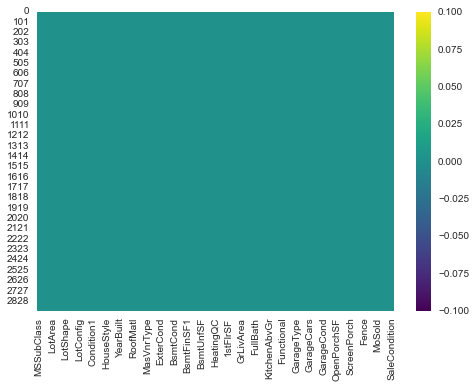

In [155]:
sns.heatmap(data.isna(),cmap = 'viridis')

In [156]:
# Now all the data have been cleaned, all the na values have been dealt with
# let's search for numerical columns that are originally categorical:

# MSSubClass : values are numerical but they represent categories
# OverallQual : values are from 1 to 10 that represent the quality ascendingly
# OverallCond : values are from 1 to 10 that represent the quality ascendingly
# MoSold: values from 1 to 12
# YrSold can be considered as a categorical feature only years from 2006 to 2010 are covered in the data

In [157]:
data.MoSold.unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [158]:
data.YrSold.value_counts()

2007    692
2009    647
2008    622
2006    619
2010    339
Name: YrSold, dtype: int64

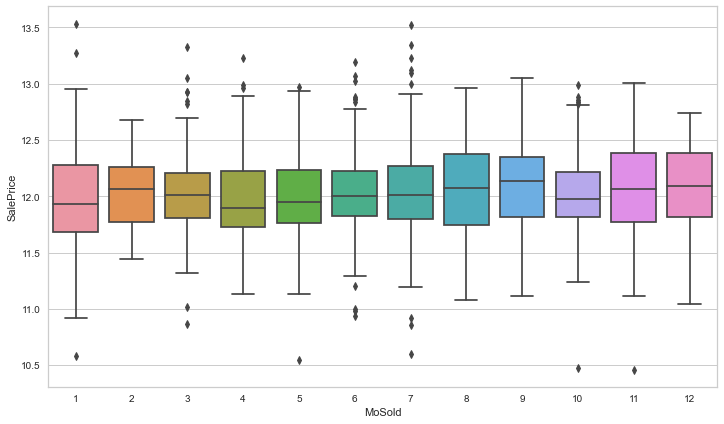

In [159]:
plt.figure(figsize = (12,7))
sns.boxplot(x=train['MoSold'],y=np.log1p(train['SalePrice']))
plt.show()

In [160]:
# now we will divide features into three categories to start encoding or using get_dummies

In [161]:
# specify ordinal features from the description file

In [162]:
#ordinal_features =['Utilities','ExterQual', 'ExterCond', 'BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2',
#                   'HeatingQC','KitchenQual','FireplaceQu','GarageFinish','GarageQual','GarageCond','PoolQC','Fence']

In [163]:
#nominal_features = categorical_columns_lst.copy()

In [164]:
#for feat  in ordinal_features:
#    nominal_features.remove(feat)

In [165]:
#data[nominal_features].nunique().sum()

In [166]:
# MSSubClass : values are numerical but they represent categories
# OverallQual : values are from 1 to 10 that represent the quality ascendingly
# OverallCond : values are from 1 to 10 that represent the quality ascendingly
# MoSold: values from 1 to 12
# YrSold can be considered as a categorical feature only years from 2006 to 2010 are covered in the data

In [167]:
# we will convert MSSubClass,MoSold, YrSold numerical features into strings so they can be identified as categories and not
# numbers

In [168]:
data.MSSubClass = data.MSSubClass.astype(str)

In [169]:
data.MoSold = data.MoSold.astype(str)

In [170]:
data.YrSold = data.YrSold.astype(str)

In [171]:
#we will start encoding ordinal categorical features using Ordinal encoder from sklearn library

In [172]:
#from sklearn.preprocessing import OrdinalEncoder

In [173]:
#for feat in ordinal_features:
#    print(feat, ':', data[feat].unique())

In [174]:
#ut = ['ELO','NoSeWa','NoSewr','AllPub']

In [175]:
#ex= ['Po','Fa','TA','Gd','Ex']

In [176]:
#q = ['None','Po','Fa','TA','Gd','Ex']

In [177]:
#bsmt_finType = ['None','Unf','LwQ','Rec','BLQ','ALQ','GLQ']

In [178]:
#h_q = ['Po','Fa','TA','Gd','Ex']

In [179]:
#k_q= ['Po','Fa','TA','Gd','Ex']

In [180]:
#g_f = ['None','Unf','RFn','Fin']

In [181]:
#pool_q = ['None','Fa','TA','Gd','Ex']

In [182]:
#fen_q = ['None','MnWw','GdWo', 'MnPrv',  'GdPrv']

In [183]:
#ord_en = OrdinalEncoder(categories  = [ut , ex , ex , q , q , bsmt_finType , bsmt_finType , h_q , k_q , q , g_f , q , 
#                                       q , pool_q , fen_q ])

In [184]:
#data[ordinal_features]

In [185]:
#ord_en.fit_transform(data[ordinal_features])

In [186]:
#data[ordinal_features] = ord_en.fit_transform(data[ordinal_features])

In [187]:
#data[ordinal_features]

In [188]:
#data[ordinal_features].info()

In [189]:
# Now that ordinal categorical features have been encoded , we will encode other nominal category features

In [190]:
#data[nominal_features].nunique().sum()

In [191]:
#from sklearn.preprocessing import OneHotEncoder

In [192]:
#ohe = OneHotEncoder(sparse = False)  # sparce = false is a must to get an array from the line code below

In [193]:
#ohe.fit_transform(data[categorical_columns_lst]).shape

In [194]:
#ohe.fit_transform(data['YrSold'])

In [195]:
#ohe.fit_transform(data[nominal_features]).shape

In [196]:
data[categorical_columns_lst].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     2919 non-null   object
 1   MSZoning       2919 non-null   object
 2   Street         2919 non-null   object
 3   Alley          2919 non-null   object
 4   LotShape       2919 non-null   object
 5   LandContour    2919 non-null   object
 6   Utilities      2919 non-null   object
 7   LotConfig      2919 non-null   object
 8   LandSlope      2919 non-null   object
 9   Neighborhood   2919 non-null   object
 10  Condition1     2919 non-null   object
 11  Condition2     2919 non-null   object
 12  BldgType       2919 non-null   object
 13  HouseStyle     2919 non-null   object
 14  RoofStyle      2919 non-null   object
 15  RoofMatl       2919 non-null   object
 16  Exterior1st    2919 non-null   object
 17  Exterior2nd    2919 non-null   object
 18  MasVnrType     2919 non-null

In [197]:
data = pd.get_dummies(data)

In [198]:
data.shape

(2919, 332)

In [199]:
numerical_columns_lst

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [200]:
pd.DataFrame({'skewness':data[numerical_columns_lst].skew(),
                 'log':np.log(data[numerical_columns_lst]).skew(),
                 'log1p':np.log1p(data[numerical_columns_lst]).skew(),
                  'sqrt':np.sqrt(data[numerical_columns_lst]).skew(),
                 'cbrt':np.cbrt(data[numerical_columns_lst]).skew(),
                 'reip':np.reciprocal(data[numerical_columns_lst]).skew(),
                 'square':np.square(data[numerical_columns_lst]).skew(),
                 'cube':np.power(data[numerical_columns_lst],3).skew()})

,skewness,log,log1p,sqrt,cbrt,reip,square,cube
LotFrontage,1.351681,-0.965633,-0.933890,-0.004737,-0.348606,2.569150,8.653120,23.887533
LotArea,12.829025,-0.505542,-0.505010,3.083432,1.428771,0.000000,31.121043,38.153089
OverallQual,0.197212,-0.994161,-0.647746,-0.256817,-0.456698,26.972189,0.843162,1.412405
OverallCond,0.570605,-1.408074,-0.746567,-0.125197,-0.462465,20.357512,1.342499,1.881625
YearBuilt,-0.600114,-0.626551,-0.626537,-0.613276,-0.617689,0.000000,-0.574123,-0.548571
YearRemodAdd,-0.451252,-0.458397,-0.458393,-0.454823,-0.456014,0.000000,-0.444123,-0.437010
MasVnrArea,2.614936,NaN,0.537294,1.066303,0.735348,NaN,7.705850,14.177475
BsmtFinSF1,1.425963,NaN,-0.616949,-0.011427,-0.339468,NaN,18.170012,42.539800
BsmtFinSF2,4.148275,NaN,2.463749,2.983072,2.677219,NaN,7.349605,12.095066
BsmtUnfSF,0.919812,NaN,-2.156314,-0.238246,-0.993514,NaN,2.302158,3.582329


In [201]:
# log 1p is the best transformation method so we will go with it for all features with numerical columns

In [202]:
data[numerical_columns_lst] = np.log1p(data[numerical_columns_lst])

In [203]:
pd.DataFrame({'skewness':data[numerical_columns_lst].skew(),
                 'log':np.log(data[numerical_columns_lst]).skew(),
                 'log1p':np.log1p(data[numerical_columns_lst]).skew(),
                  'sqrt':np.sqrt(data[numerical_columns_lst]).skew(),
                 'cbrt':np.cbrt(data[numerical_columns_lst]).skew(),
                 'reip':np.reciprocal(data[numerical_columns_lst]).skew(),
                 'square':np.square(data[numerical_columns_lst]).skew(),
                 'cube':np.power(data[numerical_columns_lst],3).skew()})

,skewness,log,log1p,sqrt,cbrt,reip,square,cube
LotFrontage,-0.933890,-1.354451,-1.270474,-1.145135,-1.215099,1.768153,-0.502342,-0.048304
LotArea,-0.505010,-0.934592,-0.893911,-0.726214,-0.796991,1.320653,-0.014130,0.562294
OverallQual,-0.647746,-1.713598,-1.183526,-1.075089,-1.258467,4.299971,-0.107431,0.247762
OverallCond,-0.746567,-2.652981,-1.691232,-1.518301,-1.849052,6.516512,0.172380,0.691010
YearBuilt,-0.626537,-0.630058,-0.629647,-0.628297,-0.628883,0.633586,-0.623025,-0.619521
YearRemodAdd,-0.458393,-0.459335,-0.459225,-0.458864,-0.459021,0.460277,-0.457451,-0.456510
MasVnrArea,0.537294,NaN,0.454676,0.457679,0.439734,NaN,0.780562,1.105745
BsmtFinSF1,-0.616949,NaN,-0.732341,-0.725005,-0.752302,NaN,-0.363142,-0.097134
BsmtFinSF2,2.463749,NaN,2.383255,2.387738,2.371198,NaN,2.693246,2.980397
BsmtUnfSF,-2.156314,NaN,-2.789417,-2.738725,-2.887936,NaN,-1.092325,-0.410847


## Target column transformation

In [204]:
target = train['SalePrice']

Text(0.5, 0, 'log-transformed SalePrice')

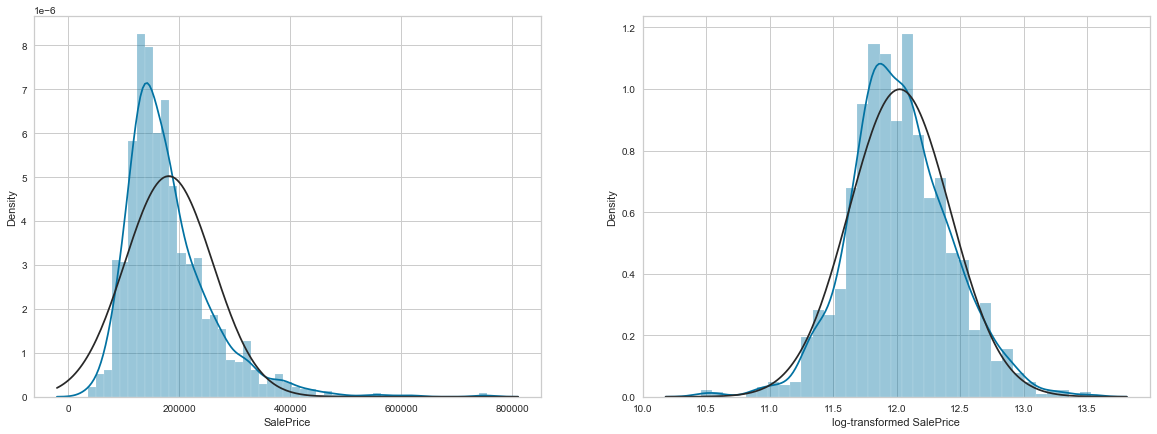

In [205]:
plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
sns.distplot(target, fit = stats.norm)
plt.xlabel('SalePrice')
plt.subplot(1,2,2)
sns.distplot(np.log(target), fit = stats.norm)
plt.xlabel('log-transformed SalePrice')

In [206]:
log_SalePrice = np.log(train.SalePrice)

## Feature Scaling

In [207]:
from sklearn.preprocessing import StandardScaler

In [208]:
scaler = StandardScaler()

In [209]:
scaler.fit(data)

StandardScaler()

In [210]:
df_scaled = scaler.transform(data)

In [211]:
data = pd.DataFrame(df_scaled, index = data.index ,  columns = data.columns)

In [212]:
data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fi

### Now that data is ready to be processed by algorithms, we split back the combined data frame 'data' to train01 and test01 data sets

In [213]:
train.index

RangeIndex(start=0, stop=1460, step=1)

In [214]:
test.index

RangeIndex(start=0, stop=1459, step=1)

In [215]:
data.index

RangeIndex(start=0, stop=2919, step=1)

In [216]:
train01 = data.loc[:train.index.max(),:]

In [217]:
test01 = data.loc[train.index.max()+1:,:]

In [218]:
pd.concat([train01,log_SalePrice],axis=1)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fi

## Model Selection

In [221]:
s = setup(data = pd.concat([train01,log_SalePrice],axis=1),target='SalePrice')

,Description,Value
0,session_id,2806
1,Target,SalePrice
2,Original Data,"(1460, 333)"
3,Missing Values,False
4,Numeric Features,45
5,Categorical Features,287
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1021, 312)"


In [219]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.0815,0.0152,0.1217,0.9027,0.0094,0.0068,9.0570
gbr,Gradient Boosting Regressor,0.0899,0.0176,0.1306,0.8882,0.0101,0.0075,0.3550
br,Bayesian Ridge,0.0855,0.0181,0.1316,0.8845,0.0101,0.0072,0.0820
lightgbm,Light Gradient Boosting Machine,0.0935,0.0190,0.1357,0.8797,0.0105,0.0078,0.1900
ridge,Ridge Regression,0.0896,0.0199,0.1373,0.8726,0.0106,0.0075,0.0270
omp,Orthogonal Matching Pursuit,0.0943,0.0205,0.1390,0.8690,0.0107,0.0079,0.0250
et,Extra Trees Regressor,0.0999,0.0209,0.1428,0.8681,0.0111,0.0084,1.2450
rf,Random Forest Regressor,0.0975,0.0217,0.1448,0.8631,0.0112,0.0082,1.1030
xgboost,Extreme Gradient Boosting,0.1007,0.0222,0.1473,0.8588,0.0114,0.0084,0.7070
par,Passive Aggressive Regressor,0.1168,0.0272,0.1633,0.8245,0.0126,0.0098,0.0380


In [222]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.0838,0.0158,0.1220,0.8976,0.0094,0.0070,0.0780
catboost,CatBoost Regressor,0.0824,0.0162,0.1237,0.8952,0.0096,0.0069,7.6810
omp,Orthogonal Matching Pursuit,0.0874,0.0165,0.1246,0.8935,0.0097,0.0073,0.0300
ridge,Ridge Regression,0.0874,0.0169,0.1261,0.8903,0.0098,0.0073,0.0290
gbr,Gradient Boosting Regressor,0.0909,0.0189,0.1344,0.8769,0.0104,0.0076,0.3540
lightgbm,Light Gradient Boosting Machine,0.0952,0.0196,0.1379,0.8713,0.0107,0.0080,0.2370
rf,Random Forest Regressor,0.0985,0.0218,0.1448,0.8585,0.0112,0.0082,1.0800
et,Extra Trees Regressor,0.1006,0.0224,0.1472,0.8536,0.0114,0.0084,1.2130
xgboost,Extreme Gradient Boosting,0.1011,0.0221,0.1462,0.8526,0.0113,0.0085,0.6180
par,Passive Aggressive Regressor,0.1198,0.0268,0.1614,0.8213,0.0125,0.0100,0.0990


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [219]:
from catboost import CatBoostRegressor
from sklearn.linear_model import BayesianRidge, Ridge, OrthogonalMatchingPursuit
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor

#### we start with the best performing model as per the pycaret run above which is CatBoost
#### we will run fit the model on the training set and then cross validate it using kfold=10 also on the trainng set as it 
#### contains a target column which is log_SalePrice

In [259]:
cbr_base_m = CatBoostRegressor(verbose=0)

In [260]:
cbr_base_m.fit(train01,log_SalePrice)

In [261]:
from sklearn.model_selection import KFold,cross_val_score

In [290]:
kf = KFold(n_splits=10)
result_s = cross_val_score(cbr_base_m , train01 , log_SalePrice , scoring='neg_mean_squared_error' , cv=kf)

In [291]:
result_s

array([-0.01338339, -0.00914968, -0.01146109, -0.02536447, -0.02060706,
       -0.01039721, -0.01451097, -0.00952991, -0.01535268, -0.01613514])

<AxesSubplot:>

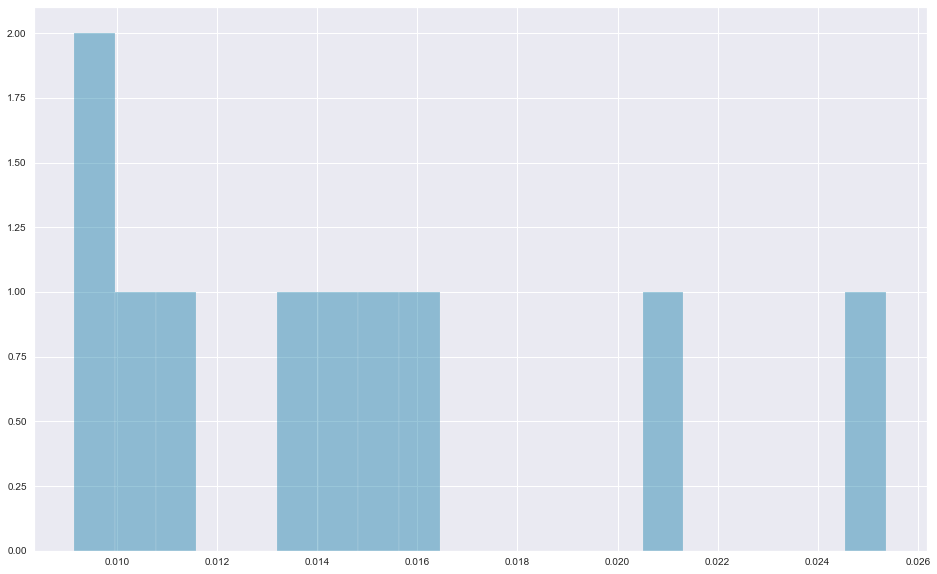

In [292]:
plt.figure(figsize=(16,10))
sns.distplot(-result_s, bins = 20,kde = False )

In [265]:
np.mean(-results)

0.014589158622533441

In [266]:
np.exp(np.sqrt(np.mean(-results)))

1.1283829492373063

### Submission CatBoost Model

In [267]:
### we make a cbr_predictions generated from the CatBoost Model above

In [268]:
cbr_predictions_log = cbr_base_m.predict(test01)

In [269]:
cbr_predictions_log

array([11.72157021, 11.97817421, 12.15914856, ..., 12.04310339,
       11.67358008, 12.32706624])

In [270]:
cbr_predictions = np.exp(cbr_predictions_log)

In [271]:
cbr_predictions

array([123200.72394499, 159241.02424119, 190831.965701  , ...,
       169923.46195808, 117427.93251797, 225723.53642266])

In [272]:
submission_sample.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [273]:
pd.Series(cbr_predictions,name='SalePrice')

0       123200.723945
1       159241.024241
2       190831.965701
3       196979.238647
4       184799.529139
            ...      
1454     81539.983642
1455     81327.993590
1456    169923.461958
1457    117427.932518
1458    225723.536423
Name: SalePrice, Length: 1459, dtype: float64

In [274]:
submission006 = pd.DataFrame(pd.concat([test['Id'],pd.Series(cbr_predictions,name='SalePrice')],axis=1))

In [275]:
submission006.set_index('Id',inplace = True)

In [276]:
submission006

,SalePrice
Id,
1461,123200.723945
1462,159241.024241
1463,190831.965701
1464,196979.238647
1465,184799.529139
...,...
2915,81539.983642
2916,81327.993590
2917,169923.461958


In [278]:
submission006.to_csv('E:/00-Data Science and Data Analysis/ML Projects/02-House Prices - Advanced Regression Techniques/dataset/submission006.csv')

### Submission Baysian Ridge Model

In [525]:
br01 = BayesianRidge()

In [526]:
br01.fit(train01,log_SalePrice)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [527]:
result_br01 = cross_val_score(br01 , train01 , log_SalePrice , scoring='neg_mean_squared_error' , cv=kf)

In [530]:
np.exp(np.sqrt(-result_br01))

array([1.12674161, 1.1081637 , 1.13234518, 1.16905989, 1.15469312,
       1.1470693 , 1.12884468, 1.10511882, 1.19721981, 1.13982032])

In [531]:
np.mean(np.exp(np.sqrt(-result_br01)))

1.1409076432346956

### Submission bagging ensemble 8 models (equal weights)

In [429]:
models = {'catboost':CatBoostRegressor(verbose=0),'gbr':GradientBoostingRegressor(),'br':BayesianRidge(), 'lgbm':LGBMRegressor()
         ,'r':Ridge(),'omp':OrthogonalMatchingPursuit(),'etr':ExtraTreesRegressor(),'xgboost':XGBRegressor()}

In [430]:
for name , model in models.items():
    model.fit(train01,log_SalePrice)
    print(name, ': trained')

catboost : trained
gbr : trained
br : trained
lgbm : trained
r : trained
omp : trained
etr : trained
xgboost : trained


In [431]:
results = {}
kf = KFold(n_splits=10)
for name , model in models.items():
    result = -cross_val_score(model , train01 , log_SalePrice , scoring='neg_mean_squared_error' , cv=kf)
    results[name] = result   

In [432]:
results

{'catboost': array([0.01338339, 0.00914968, 0.01146109, 0.02536447, 0.02060706,
        0.01039721, 0.01451097, 0.00952991, 0.01535268, 0.01613514]),
 'gbr': array([0.01662235, 0.010639  , 0.01337382, 0.02369907, 0.02408298,
        0.01090484, 0.01703485, 0.01115192, 0.01471645, 0.02002777]),
 'br': array([0.01423963, 0.01054818, 0.01544822, 0.02439841, 0.02068839,
        0.01882665, 0.01468816, 0.00999057, 0.03240074, 0.01712712]),
 'lgbm': array([0.01745782, 0.01118081, 0.01353495, 0.02524001, 0.02435446,
        0.01313875, 0.01668991, 0.0107132 , 0.01671842, 0.02035314]),
 'r': array([0.01620261, 0.01158185, 0.0156422 , 0.0261165 , 0.0227712 ,
        0.02437283, 0.01582662, 0.01016267, 0.03823432, 0.0167524 ]),
 'omp': array([0.01384396, 0.00918748, 0.01312731, 0.02545797, 0.02088157,
        0.02356257, 0.01554888, 0.01320868, 0.02580448, 0.01607706]),
 'etr': array([0.016888  , 0.01383289, 0.02011469, 0.03034471, 0.0371309 ,
        0.01664193, 0.01802001, 0.01399523, 0.018676

In [434]:
for name , result in results.items():
    print('----',name,'----')
    print('mean = ',np.mean(np.exp(np.sqrt(result))))
    print('std  = ',np.std(np.exp(np.sqrt(result))))
    print('----------------')

---- catboost ----
mean =  1.1268293951959307
std  =  0.02199239468977014
----------------
---- gbr ----
mean =  1.1345032177354466
std  =  0.021084668749315194
----------------
---- br ----
mean =  1.1409076432346956
std  =  0.026391874265264178
----------------
---- lgbm ----
mean =  1.137702879211222
std  =  0.020963362696464972
----------------
---- r ----
mean =  1.1484108102579715
std  =  0.031029216887068983
----------------
---- omp ----
mean =  1.1405260015251724
std  =  0.02388342900058271
----------------
---- etr ----
mean =  1.152996830389221
std  =  0.02658750661339863
----------------
---- xgboost ----
mean =  1.1475586023581166
std  =  0.023600635713972636
----------------


### combine predictions

In [449]:
combined_predictions = (   0.125* np.exp(models['catboost'].predict(test01))+
                           0.125* np.exp(models['gbr'].predict(test01))+
                           0.125* np.exp(models['br'].predict(test01))+
                           0.125* np.exp(models['lgbm'].predict(test01))+
                           0.125* np.exp(models['r'].predict(test01))+
                           0.125* np.exp(models['omp'].predict(test01))+
                           0.125* np.exp(models['etr'].predict(test01))+
                           0.125* np.exp(models['xgboost'].predict(test01)))

In [450]:
combined_predictions

array([122803.05417509, 161136.42167253, 183206.61377456, ...,
       164774.55266745, 117079.15861253, 221207.11242952])

In [440]:
submission007 = pd.DataFrame(pd.concat([test['Id'],pd.Series(combined_predictions,name='SalePrice')],axis=1))

In [441]:
submission007.set_index('Id',inplace = True)

In [442]:
submission007

,SalePrice
Id,
1461,122803.054175
1462,161136.421673
1463,183206.613775
1464,193708.680754
1465,192943.621730
...,...
2915,81591.579910
2916,83803.137976
2917,164774.552667


In [443]:
submission007.to_csv('E:/00-Data Science and Data Analysis/ML Projects/02-House Prices - Advanced Regression Techniques/dataset/submission007.csv')

### submission008 with custome ensemble weights

#### we are going to drop the etr and r modesl and put more weight to catboost model

In [451]:
combined_predictions_01 = (   0.25* np.exp(models['catboost'].predict(test01))+
                           0.15* np.exp(models['gbr'].predict(test01))+
                           0.15* np.exp(models['br'].predict(test01))+
                           0.15* np.exp(models['lgbm'].predict(test01))+
                           0.15* np.exp(models['omp'].predict(test01))+
                           0.15* np.exp(models['xgboost'].predict(test01)))

In [452]:
combined_predictions_01

array([123271.27019192, 161076.86048795, 184645.51262108, ...,
       165854.84328765, 117092.97274179, 224540.91133691])

In [456]:
submission008 = pd.DataFrame(pd.concat([test['Id'],pd.Series(combined_predictions_01,name='SalePrice')],axis=1))

In [457]:
submission008.set_index('Id',inplace = True)

In [458]:
submission008

,SalePrice
Id,
1461,123271.270192
1462,161076.860488
1463,184645.512621
1464,193200.002017
1465,191800.615203
...,...
2915,80708.362411
2916,83606.311125
2917,165854.843288


In [459]:
submission008.to_csv('E:/00-Data Science and Data Analysis/ML Projects/02-House Prices - Advanced Regression Techniques/dataset/submission008.csv')

### submission009 with custom ensemble weights

#### we are going to drop the XGboost model and put more weight to catboost model

In [467]:
results_009 = results.copy()
results_009.pop('r')
results_009.pop('etr')
results_009.pop('xgboost')

array([0.01759358, 0.01249184, 0.01485519, 0.03114122, 0.02561416,
       0.01277746, 0.02408877, 0.01609338, 0.01638922, 0.02200489])

In [468]:
results_009

{'catboost': array([0.01338339, 0.00914968, 0.01146109, 0.02536447, 0.02060706,
        0.01039721, 0.01451097, 0.00952991, 0.01535268, 0.01613514]),
 'gbr': array([0.01662235, 0.010639  , 0.01337382, 0.02369907, 0.02408298,
        0.01090484, 0.01703485, 0.01115192, 0.01471645, 0.02002777]),
 'br': array([0.01423963, 0.01054818, 0.01544822, 0.02439841, 0.02068839,
        0.01882665, 0.01468816, 0.00999057, 0.03240074, 0.01712712]),
 'lgbm': array([0.01745782, 0.01118081, 0.01353495, 0.02524001, 0.02435446,
        0.01313875, 0.01668991, 0.0107132 , 0.01671842, 0.02035314]),
 'omp': array([0.01384396, 0.00918748, 0.01312731, 0.02545797, 0.02088157,
        0.02356257, 0.01554888, 0.01320868, 0.02580448, 0.01607706])}

In [476]:
sum_mean=0
sum_std=0
for name , result in results_009.items():
    sum_mean+=np.mean(np.exp(np.sqrt(result)))
    sum_std+=np.std(np.exp(np.sqrt(result)))
print(sum_mean)
print(sum_std)
for name , result in results_009.items():
    print('----',name,'----')
    print('mean = ',np.mean(np.exp(np.sqrt(result))))
    print('std  = ',np.std(np.exp(np.sqrt(result))))
    print('mean_ratio = ',np.mean(np.exp(np.sqrt(result)))/sum_mean)
    print('std_ratio  = ',np.std(np.exp(np.sqrt(result)))/sum_std)
    print('----------------')

5.680469136902467
0.1143157294013972
---- catboost ----
mean =  1.1268293951959307
std  =  0.02199239468977014
mean_ratio =  0.19836907270134127
std_ratio  =  0.19238292757200692
----------------
---- gbr ----
mean =  1.1345032177354466
std  =  0.021084668749315194
mean_ratio =  0.19971998621826612
std_ratio  =  0.18444241102884912
----------------
---- br ----
mean =  1.1409076432346956
std  =  0.026391874265264178
mean_ratio =  0.2008474327979233
std_ratio  =  0.23086826636598978
----------------
---- lgbm ----
mean =  1.137702879211222
std  =  0.020963362696464972
mean_ratio =  0.20028326037725927
std_ratio  =  0.18338126175844313
----------------
---- omp ----
mean =  1.1405260015251724
std  =  0.02388342900058271
mean_ratio =  0.20078024790521015
std_ratio  =  0.208925133274711
----------------


In [485]:
combined_predictions_02 = (   0.30* np.exp(models['catboost'].predict(test01))+
                           0.175* np.exp(models['gbr'].predict(test01))+
                           0.175* np.exp(models['br'].predict(test01))+
                           0.175* np.exp(models['lgbm'].predict(test01))+
                           0.175* np.exp(models['omp'].predict(test01)) )

In [486]:
combined_predictions_02

array([122814.03610053, 160165.58437806, 185208.46600127, ...,
       164058.06607065, 117878.60266244, 224589.03410284])

In [487]:
submission009 = pd.DataFrame(pd.concat([test['Id'],pd.Series(combined_predictions_02,name='SalePrice')],axis=1))

In [488]:
submission009.set_index('Id',inplace = True)

In [489]:
submission009

,SalePrice
Id,
1461,122814.036101
1462,160165.584378
1463,185208.466001
1464,194330.705644
1465,195109.437446
...,...
2915,82186.995268
2916,82290.534573
2917,164058.066071


In [490]:
submission009.to_csv('E:/00-Data Science and Data Analysis/ML Projects/02-House Prices - Advanced Regression Techniques/dataset/submission009.csv')

### Trying HyperParameter optimization

In [574]:
import optuna

In [577]:
def br_objective(trial):
    n_iter = trial.suggest_int('n_iter',50,600)
    tol = trial.suggest_loguniform('tol',1e-8,10)
    alpha_1 = trial.suggest_loguniform('alpha_1', 1e-8 , 10.0)
    alpha_2 = trial.suggest_loguniform('alpha_2', 1e-8 , 10.0)
    lambda_1 = trial.suggest_loguniform('lambda_1', 1e-8 , 10.0)
    lambda_2 = trial.suggest_loguniform('lambda_2', 1e-8 , 10.0)
    op_br = BayesianRidge(n_iter=n_iter,
                          tol=tol,
                          alpha_1=alpha_1,
                          lambda_1=lambda_1,
                          lambda_2=lambda_2)
    
    op_br.fit(train01 , log_SalePrice)
    
    cv_scores =  np.exp(np.sqrt(-cross_val_score(op_br , train01 , log_SalePrice , scoring='neg_mean_squared_error' , cv=kf)))
    
    return np.mean(cv_scores)

In [578]:
study = optuna.create_study(direction = 'minimize')
study.optimize(br_objective , n_trials=100)

[I 2022-08-02 14:21:58,150] A new study created in memory with name: no-name-3c7a209e-072c-41d5-906c-4ee7934be799
[I 2022-08-02 14:22:00,453] Trial 0 finished with value: 1.1432977092955627 and parameters: {'n_iter': 413, 'tol': 0.024478610871657508, 'alpha_1': 0.00020716527343475852, 'alpha_2': 0.005631618851659334, 'lambda_1': 1.2587880208936815e-05, 'lambda_2': 0.018490495998777556}. Best is trial 0 with value: 1.1432977092955627.
[I 2022-08-02 14:22:01,291] Trial 1 finished with value: 1.1485976845929438 and parameters: {'n_iter': 335, 'tol': 0.141084493414132, 'alpha_1': 1.6748770820133674e-05, 'alpha_2': 1.3641241431896802, 'lambda_1': 5.9133717357354275e-06, 'lambda_2': 1.6124972324949476}. Best is trial 0 with value: 1.1432977092955627.
[I 2022-08-02 14:22:02,296] Trial 2 finished with value: 1.1412365994307623 and parameters: {'n_iter': 413, 'tol': 7.952696477964131e-06, 'alpha_1': 1.4123223038637924, 'alpha_2': 1.7697556954596726e-08, 'lambda_1': 2.4963287441691504, 'lambda_2

[I 2022-08-02 14:22:29,609] Trial 25 finished with value: 1.140626171207059 and parameters: {'n_iter': 383, 'tol': 8.309018667022672e-07, 'alpha_1': 5.787767754973959e-05, 'alpha_2': 1.200277211544395e-07, 'lambda_1': 9.750232321041926, 'lambda_2': 1.153483054937477e-06}. Best is trial 16 with value: 1.1406206254077047.
[I 2022-08-02 14:22:31,025] Trial 26 finished with value: 1.14091442009293 and parameters: {'n_iter': 373, 'tol': 3.048324245714693e-07, 'alpha_1': 6.003251399301168e-05, 'alpha_2': 7.791332360142192e-08, 'lambda_1': 0.00468164162667069, 'lambda_2': 2.9810406715451768e-05}. Best is trial 16 with value: 1.1406206254077047.
[I 2022-08-02 14:22:32,414] Trial 27 finished with value: 1.1408649491645182 and parameters: {'n_iter': 299, 'tol': 1.3723798551089823e-06, 'alpha_1': 7.155575703987731e-07, 'alpha_2': 1.958199289397432e-06, 'lambda_1': 1.4299212157112813, 'lambda_2': 6.853498630749512e-07}. Best is trial 16 with value: 1.1406206254077047.
[I 2022-08-02 14:22:33,560] T

[I 2022-08-02 14:22:57,104] Trial 50 finished with value: 1.1409074321896133 and parameters: {'n_iter': 50, 'tol': 4.891036007444238e-05, 'alpha_1': 0.020602239471022177, 'alpha_2': 0.0007654467857015934, 'lambda_1': 2.5078109839947433e-07, 'lambda_2': 3.2462765017473036e-07}. Best is trial 16 with value: 1.1406206254077047.
[I 2022-08-02 14:22:58,064] Trial 51 finished with value: 1.140623717708824 and parameters: {'n_iter': 441, 'tol': 0.00017661611214852342, 'alpha_1': 4.059817674925603e-06, 'alpha_2': 7.844105576687808e-05, 'lambda_1': 9.828774828491174, 'lambda_2': 3.289214599722243e-08}. Best is trial 16 with value: 1.1406206254077047.
[I 2022-08-02 14:22:58,945] Trial 52 finished with value: 1.140770861301721 and parameters: {'n_iter': 433, 'tol': 0.0031206665218858442, 'alpha_1': 3.2708269056785778e-06, 'alpha_2': 4.8728881586076525e-05, 'lambda_1': 4.658968279855563, 'lambda_2': 4.1333507189299783e-08}. Best is trial 16 with value: 1.1406206254077047.
[I 2022-08-02 14:22:59,98

[I 2022-08-02 14:23:24,609] Trial 75 finished with value: 1.1408388144172492 and parameters: {'n_iter': 495, 'tol': 5.548569602274044e-06, 'alpha_1': 0.00036067974515716604, 'alpha_2': 1.2046313432444595e-05, 'lambda_1': 2.4482332231421684, 'lambda_2': 1.6099542698800588e-05}. Best is trial 16 with value: 1.1406206254077047.
[I 2022-08-02 14:23:25,998] Trial 76 finished with value: 1.14074714915204 and parameters: {'n_iter': 422, 'tol': 0.0004720719255974776, 'alpha_1': 4.975520873289541e-05, 'alpha_2': 2.3832675869167285e-05, 'lambda_1': 5.479603475458562, 'lambda_2': 1.0535535033472479e-06}. Best is trial 16 with value: 1.1406206254077047.
[I 2022-08-02 14:23:26,848] Trial 77 finished with value: 1.1408827775976422 and parameters: {'n_iter': 450, 'tol': 0.005306060191284967, 'alpha_1': 0.039236233655464546, 'alpha_2': 7.971896885710516e-05, 'lambda_1': 0.8865383861894134, 'lambda_2': 2.8829695941661436e-06}. Best is trial 16 with value: 1.1406206254077047.
[I 2022-08-02 14:23:27,929]

In [580]:
study.best_params

{'n_iter': 492,
 'tol': 0.0018686052265045683,
 'alpha_1': 0.00623854306738154,
 'alpha_2': 1.9861300153063412e-07,
 'lambda_1': 9.956444983866877,
 'lambda_2': 2.5815902917188803e-07}

### parameters below for catboost, lgbm and ridge models are taken from Gabriel's Video
### BayesianRidge hyperparameters are taken from the run above

In [220]:
br_param = {'n_iter': 492,
     'tol': 0.0018686052265045683,
     'alpha_1': 0.00623854306738154,
     'alpha_2': 1.9861300153063412e-07,
     'lambda_1': 9.956444983866877,
 'lambda_2': 2.5815902917188803e-07
}

In [221]:
catboost_param= {'iterations':6000,
    'learning_rate':0.005,
    'depth':4,
    'l2_leaf_reg':1,
    'eval_metric':'RMSE',
    'early_stopping_rounds':200,
    'random_seed':42
}

In [222]:
lgbm_param = {  'num_leaves': 39,
    'max_depth': 2,
    'learning_rate': 0.13705339989856127,
    'n_estimators': 273    
}

### We will use Optuna to optimize hyperparameters for LGBM, GBR and OMP models

In [650]:
def lgbm_objective(trial):
    num_leaves   = trial.suggest_int('num_leaves',20,200)
    
    op_lgbm = LGBMRegressor(        max_depth = 75,
                                    num_leaves = num_leaves,
                                    learning_rate= 0.10019531353013397,
                                    n_estimators= 173,
                                    min_child_weight = 0.006045642013402679,
                                    min_child_samples = 53
                                        )
    
    op_lgbm.fit(train01 , log_SalePrice)
    
    cv_scores =  np.exp(np.sqrt(-cross_val_score(op_lgbm , train01 , log_SalePrice , scoring='neg_mean_squared_error' , cv=kf)))
    
    return np.mean(cv_scores)

In [651]:
lgbm_study = optuna.create_study(direction = 'minimize')
lgbm_study.optimize(lgbm_objective , n_trials=100)

[I 2022-08-03 12:02:22,538] A new study created in memory with name: no-name-f6f78e29-692e-4f4d-aa4f-3bcbe215d241
[I 2022-08-03 12:02:26,226] Trial 0 finished with value: 1.1387634466960723 and parameters: {'num_leaves': 77}. Best is trial 0 with value: 1.1387634466960723.
[I 2022-08-03 12:02:29,922] Trial 1 finished with value: 1.1387634466960723 and parameters: {'num_leaves': 66}. Best is trial 0 with value: 1.1387634466960723.
[I 2022-08-03 12:02:33,519] Trial 2 finished with value: 1.1387634466960723 and parameters: {'num_leaves': 98}. Best is trial 0 with value: 1.1387634466960723.
[I 2022-08-03 12:02:37,274] Trial 3 finished with value: 1.1387634466960723 and parameters: {'num_leaves': 87}. Best is trial 0 with value: 1.1387634466960723.
[I 2022-08-03 12:02:40,947] Trial 4 finished with value: 1.1387634466960723 and parameters: {'num_leaves': 99}. Best is trial 0 with value: 1.1387634466960723.
[I 2022-08-03 12:02:44,540] Trial 5 finished with value: 1.1387634466960723 and parame

[I 2022-08-03 12:05:23,543] Trial 47 finished with value: 1.1387634466960723 and parameters: {'num_leaves': 124}. Best is trial 0 with value: 1.1387634466960723.
[I 2022-08-03 12:05:27,092] Trial 48 finished with value: 1.1387634466960723 and parameters: {'num_leaves': 88}. Best is trial 0 with value: 1.1387634466960723.
[I 2022-08-03 12:05:30,689] Trial 49 finished with value: 1.1387634466960723 and parameters: {'num_leaves': 108}. Best is trial 0 with value: 1.1387634466960723.
[I 2022-08-03 12:05:34,699] Trial 50 finished with value: 1.1387634466960723 and parameters: {'num_leaves': 97}. Best is trial 0 with value: 1.1387634466960723.
[I 2022-08-03 12:05:38,609] Trial 51 finished with value: 1.1387634466960723 and parameters: {'num_leaves': 130}. Best is trial 0 with value: 1.1387634466960723.
[I 2022-08-03 12:05:42,371] Trial 52 finished with value: 1.1387634466960723 and parameters: {'num_leaves': 69}. Best is trial 0 with value: 1.1387634466960723.
[I 2022-08-03 12:05:45,949] Tri

[I 2022-08-03 12:08:20,952] Trial 94 finished with value: 1.1387634466960723 and parameters: {'num_leaves': 149}. Best is trial 0 with value: 1.1387634466960723.
[I 2022-08-03 12:08:24,640] Trial 95 finished with value: 1.1387634466960723 and parameters: {'num_leaves': 180}. Best is trial 0 with value: 1.1387634466960723.
[I 2022-08-03 12:08:28,476] Trial 96 finished with value: 1.1387634466960723 and parameters: {'num_leaves': 169}. Best is trial 0 with value: 1.1387634466960723.
[I 2022-08-03 12:08:32,293] Trial 97 finished with value: 1.1387634466960723 and parameters: {'num_leaves': 175}. Best is trial 0 with value: 1.1387634466960723.
[I 2022-08-03 12:08:36,128] Trial 98 finished with value: 1.1387634466960723 and parameters: {'num_leaves': 189}. Best is trial 0 with value: 1.1387634466960723.
[I 2022-08-03 12:08:39,774] Trial 99 finished with value: 1.1387634466960723 and parameters: {'num_leaves': 30}. Best is trial 0 with value: 1.1387634466960723.


In [643]:
lgbm_study.best_params

{'num_leaves': 71,
 'learning_rate': 0.10019531353013397,
 'n_estimators': 173,
 'min_child_weight': 0.006045642013402679,
 'min_child_samples': 53}

In [645]:
lgbm02 =LGBMRegressor( **lgbm_param) 
lgbm02.fit(train01 , log_SalePrice)  
lgbm02_cv_scores =  np.exp(np.sqrt(-cross_val_score(lgbm02 , train01 , log_SalePrice , scoring='neg_mean_squared_error' , cv=kf)))
np.mean(lgbm02_cv_scores)

1.134168588484799

#### Best parameters above result in less acurate model than gabriel's parameters so we will use Gabriel's Parameters

In [602]:
def gbr_objective(trial):
    learning_rate= trial.suggest_loguniform('learning_rate',1e-8,10)
    n_estimators= trial.suggest_int('n_estimators',5,500)
    min_samples_split= trial.suggest_int('min_samples_split',2,50)
    min_samples_leaf= trial.suggest_int('min_samples_leaf',2,50)
    max_depth=trial.suggest_int('max_depth',1,50)
    tol=trial.suggest_loguniform('tol',1e-8,10)
    
    
    
    
    op_gbr = GradientBoostingRegressor(    learning_rate= learning_rate,
                                            n_estimators= n_estimators,
                                            min_samples_split= min_samples_split,
                                            min_samples_leaf= min_samples_leaf,
                                            max_depth=max_depth,
                                            tol=tol
                                        )
    
    op_gbr.fit(train01 , log_SalePrice)
    
    cv_scores =  np.exp(np.sqrt(-cross_val_score(op_gbr , train01 , log_SalePrice , scoring='neg_mean_squared_error' , cv=kf)))
    
    return np.mean(cv_scores)

In [603]:
gbr_study = optuna.create_study(direction = 'minimize')
gbr_study.optimize(gbr_objective , n_trials=100)

[I 2022-08-02 16:27:55,629] A new study created in memory with name: no-name-55ce5a6f-33f2-40a0-ba25-ed31173df490
[I 2022-08-02 16:30:23,179] Trial 0 finished with value: 1.2909336595851753 and parameters: {'learning_rate': 1.4166147061685113, 'n_estimators': 471, 'min_samples_split': 9, 'min_samples_leaf': 47, 'max_depth': 35, 'tol': 6.280510484237914e-06}. Best is trial 0 with value: 1.2909336595851753.
[I 2022-08-02 16:30:41,398] Trial 1 finished with value: inf and parameters: {'learning_rate': 6.5803430357685855, 'n_estimators': 126, 'min_samples_split': 25, 'min_samples_leaf': 8, 'max_depth': 3, 'tol': 0.008361860180191406}. Best is trial 0 with value: 1.2909336595851753.
[I 2022-08-02 16:36:11,873] Trial 2 finished with value: 1.1491393255637452 and parameters: {'learning_rate': 0.023156701544034368, 'n_estimators': 426, 'min_samples_split': 2, 'min_samples_leaf': 6, 'max_depth': 33, 'tol': 0.00012488099571458374}. Best is trial 2 with value: 1.1491393255637452.
[I 2022-08-02 16

[I 2022-08-02 17:58:34,164] Trial 27 finished with value: 1.1367153394928402 and parameters: {'learning_rate': 0.02850726806344333, 'n_estimators': 457, 'min_samples_split': 49, 'min_samples_leaf': 14, 'max_depth': 7, 'tol': 0.01931288302456289}. Best is trial 27 with value: 1.1367153394928402.
[I 2022-08-02 17:59:45,694] Trial 28 finished with value: 1.482301668339273 and parameters: {'learning_rate': 5.3205058136851286e-05, 'n_estimators': 328, 'min_samples_split': 50, 'min_samples_leaf': 9, 'max_depth': 5, 'tol': 1.3294137945068283}. Best is trial 27 with value: 1.1367153394928402.
[I 2022-08-02 17:59:58,891] Trial 29 finished with value: 1.142921612731953 and parameters: {'learning_rate': 1.1306033502830666, 'n_estimators': 264, 'min_samples_split': 47, 'min_samples_leaf': 28, 'max_depth': 1, 'tol': 4.4268628301130547e-07}. Best is trial 27 with value: 1.1367153394928402.
[I 2022-08-02 18:02:23,812] Trial 30 finished with value: 1.1518498430976427 and parameters: {'learning_rate': 

[I 2022-08-02 18:30:09,992] Trial 54 finished with value: 1.1583173193508929 and parameters: {'learning_rate': 0.5492110574052157, 'n_estimators': 229, 'min_samples_split': 28, 'min_samples_leaf': 37, 'max_depth': 4, 'tol': 0.09055180902675568}. Best is trial 34 with value: 1.1335532894820661.
[I 2022-08-02 21:31:14,676] Trial 55 finished with value: 1.138330891393514 and parameters: {'learning_rate': 0.10252454205568824, 'n_estimators': 251, 'min_samples_split': 35, 'min_samples_leaf': 40, 'max_depth': 7, 'tol': 0.017338477361162872}. Best is trial 34 with value: 1.1335532894820661.
[I 2022-08-03 09:19:52,426] Trial 56 finished with value: 1.1403581743565723 and parameters: {'learning_rate': 0.17802661982972942, 'n_estimators': 345, 'min_samples_split': 25, 'min_samples_leaf': 47, 'max_depth': 4, 'tol': 0.03471222632227167}. Best is trial 34 with value: 1.1335532894820661.
[I 2022-08-03 09:20:32,511] Trial 57 finished with value: 1.2353431784687938 and parameters: {'learning_rate': 0.

[I 2022-08-03 09:48:38,970] Trial 81 finished with value: 1.1376607254204072 and parameters: {'learning_rate': 0.06861184032843426, 'n_estimators': 112, 'min_samples_split': 40, 'min_samples_leaf': 5, 'max_depth': 7, 'tol': 0.4420128975355887}. Best is trial 63 with value: 1.1309280024091282.
[I 2022-08-03 09:49:08,475] Trial 82 finished with value: 1.1380195520930791 and parameters: {'learning_rate': 0.07280740679530591, 'n_estimators': 109, 'min_samples_split': 40, 'min_samples_leaf': 5, 'max_depth': 7, 'tol': 9.821650887298327}. Best is trial 63 with value: 1.1309280024091282.
[I 2022-08-03 09:50:00,893] Trial 83 finished with value: 1.1416262384312077 and parameters: {'learning_rate': 0.1329945698028544, 'n_estimators': 139, 'min_samples_split': 37, 'min_samples_leaf': 7, 'max_depth': 10, 'tol': 0.31127395255721063}. Best is trial 63 with value: 1.1309280024091282.
[I 2022-08-03 09:50:24,422] Trial 84 finished with value: 1.2891421199117994 and parameters: {'learning_rate': 1.39748

In [604]:
gbr_study.best_params

{'learning_rate': 0.07349784987251627,
 'n_estimators': 458,
 'min_samples_split': 32,
 'min_samples_leaf': 7,
 'max_depth': 3,
 'tol': 0.17057501671876868}

In [223]:
gbr_param = {'learning_rate': 0.07349784987251627,
 'n_estimators': 458,
 'min_samples_split': 32,
 'min_samples_leaf': 7,
 'max_depth': 3,
 'tol': 0.17057501671876868}

In [606]:
def omp_objective(trial):
    tol=trial.suggest_loguniform('tol',1e-8,10)
    op_omp = OrthogonalMatchingPursuit(tol = tol)
    
    op_omp.fit(train01 , log_SalePrice)
    
    cv_scores =  np.exp(np.sqrt(-cross_val_score(op_omp , train01 , log_SalePrice , scoring='neg_mean_squared_error' , cv=kf)))
    
    return np.mean(cv_scores)

In [607]:
omp_study = optuna.create_study(direction = 'minimize')
omp_study.optimize(omp_objective , n_trials=100)

[I 2022-08-03 09:57:20,880] A new study created in memory with name: no-name-4d3de1c2-9abf-4106-9c1e-f985f7de5f58
[I 2022-08-03 09:57:22,339] Trial 0 finished with value: 1.2701474668803976 and parameters: {'tol': 1.4693909036879606e-06}. Best is trial 0 with value: 1.2701474668803976.
[I 2022-08-03 09:57:23,003] Trial 1 finished with value: 1.2701474668803976 and parameters: {'tol': 1.9472203580964794e-07}. Best is trial 0 with value: 1.2701474668803976.
[I 2022-08-03 09:57:23,638] Trial 2 finished with value: 1.2701474668803976 and parameters: {'tol': 0.0013191368031120125}. Best is trial 0 with value: 1.2701474668803976.
[I 2022-08-03 09:57:24,240] Trial 3 finished with value: 1.2701474668803976 and parameters: {'tol': 8.677473422622006e-08}. Best is trial 0 with value: 1.2701474668803976.
[I 2022-08-03 09:57:24,866] Trial 4 finished with value: 1.2701474668803976 and parameters: {'tol': 0.00021540493957555333}. Best is trial 0 with value: 1.2701474668803976.
[I 2022-08-03 09:57:25,

[I 2022-08-03 09:57:54,563] Trial 44 finished with value: 1.2701474668803976 and parameters: {'tol': 0.2488957293132375}. Best is trial 0 with value: 1.2701474668803976.
[I 2022-08-03 09:57:55,238] Trial 45 finished with value: 1.2701474668803976 and parameters: {'tol': 0.07195997731225039}. Best is trial 0 with value: 1.2701474668803976.
[I 2022-08-03 09:57:55,873] Trial 46 finished with value: 1.2701474668803976 and parameters: {'tol': 3.4570717271635054}. Best is trial 0 with value: 1.2701474668803976.
[I 2022-08-03 09:57:56,526] Trial 47 finished with value: 1.2701474668803976 and parameters: {'tol': 0.4240010407948168}. Best is trial 0 with value: 1.2701474668803976.
[I 2022-08-03 09:57:57,156] Trial 48 finished with value: 1.2701474668803976 and parameters: {'tol': 7.3322901669096545}. Best is trial 0 with value: 1.2701474668803976.
[I 2022-08-03 09:57:57,762] Trial 49 finished with value: 1.270119212665688 and parameters: {'tol': 9.941573492480998}. Best is trial 49 with value: 

[I 2022-08-03 09:58:27,081] Trial 89 finished with value: 1.2701474668803976 and parameters: {'tol': 0.0001300022780856884}. Best is trial 49 with value: 1.270119212665688.
[I 2022-08-03 09:58:27,862] Trial 90 finished with value: 1.2701474668803976 and parameters: {'tol': 0.000482293242645015}. Best is trial 49 with value: 1.270119212665688.
[I 2022-08-03 09:58:28,467] Trial 91 finished with value: 1.2701474668803976 and parameters: {'tol': 0.0006587216952560831}. Best is trial 49 with value: 1.270119212665688.
[I 2022-08-03 09:58:29,373] Trial 92 finished with value: 1.2701474668803976 and parameters: {'tol': 3.184309147034414e-05}. Best is trial 49 with value: 1.270119212665688.
[I 2022-08-03 09:58:30,193] Trial 93 finished with value: 1.2701474668803976 and parameters: {'tol': 0.000751062418343783}. Best is trial 49 with value: 1.270119212665688.
[I 2022-08-03 09:58:30,908] Trial 94 finished with value: 1.2701474668803976 and parameters: {'tol': 0.0023550078155921534}. Best is tria

In [609]:
omp_study.best_params

{'tol': 9.941573492480998}

In [224]:
omp_param = {'tol': 9.941573492480998}

In [611]:
#the above value results in a less accurate model than with the default hyper parameters withn the omp model in scikit learn
#so we will go with the defaults

In [225]:
models_ensemble = {'catboost':CatBoostRegressor(verbose=0),'gbr':GradientBoostingRegressor(),'br':BayesianRidge(), 'lgbm':LGBMRegressor()
         ,'omp':OrthogonalMatchingPursuit()}

### final catboost submission with the optimized hyperparameters

In [235]:
catboost_final = CatBoostRegressor(**catboost_param)
catboost_final.fit(train01,log_SalePrice)
catboost_log_pred = catboost_final.predict(test01)
catboost_pred = np.exp(catboost_log_pred)
catboost_predictions = pd.DataFrame(pd.concat([test['Id'],pd.Series(catboost_pred,name='SalePrice')],axis=1))
catboost_predictions.set_index('Id',inplace=True)
catboost_predictions

0:	learn: 0.3980237	total: 182ms	remaining: 18m 12s
1:	learn: 0.3967654	total: 198ms	remaining: 9m 53s
2:	learn: 0.3956242	total: 208ms	remaining: 6m 54s
3:	learn: 0.3944434	total: 215ms	remaining: 5m 22s
4:	learn: 0.3931690	total: 223ms	remaining: 4m 27s
5:	learn: 0.3919653	total: 231ms	remaining: 3m 50s
6:	learn: 0.3907929	total: 235ms	remaining: 3m 21s
7:	learn: 0.3895866	total: 238ms	remaining: 2m 58s
8:	learn: 0.3884028	total: 241ms	remaining: 2m 40s
9:	learn: 0.3871625	total: 244ms	remaining: 2m 26s
10:	learn: 0.3858813	total: 247ms	remaining: 2m 14s
11:	learn: 0.3847480	total: 250ms	remaining: 2m 4s
12:	learn: 0.3835515	total: 253ms	remaining: 1m 56s
13:	learn: 0.3823973	total: 256ms	remaining: 1m 49s
14:	learn: 0.3811920	total: 259ms	remaining: 1m 43s
15:	learn: 0.3800478	total: 262ms	remaining: 1m 38s
16:	learn: 0.3788658	total: 265ms	remaining: 1m 33s
17:	learn: 0.3776698	total: 268ms	remaining: 1m 29s
18:	learn: 0.3764528	total: 271ms	remaining: 1m 25s
19:	learn: 0.3753217	t

179:	learn: 0.2489620	total: 775ms	remaining: 25.1s
180:	learn: 0.2484460	total: 781ms	remaining: 25.1s
181:	learn: 0.2479645	total: 786ms	remaining: 25.1s
182:	learn: 0.2474454	total: 792ms	remaining: 25.2s
183:	learn: 0.2468809	total: 795ms	remaining: 25.1s
184:	learn: 0.2463486	total: 799ms	remaining: 25.1s
185:	learn: 0.2458743	total: 802ms	remaining: 25.1s
186:	learn: 0.2453807	total: 805ms	remaining: 25s
187:	learn: 0.2448699	total: 809ms	remaining: 25s
188:	learn: 0.2443508	total: 812ms	remaining: 25s
189:	learn: 0.2438345	total: 816ms	remaining: 24.9s
190:	learn: 0.2433163	total: 843ms	remaining: 25.6s
191:	learn: 0.2427908	total: 853ms	remaining: 25.8s
192:	learn: 0.2422512	total: 859ms	remaining: 25.8s
193:	learn: 0.2417521	total: 863ms	remaining: 25.8s
194:	learn: 0.2412498	total: 867ms	remaining: 25.8s
195:	learn: 0.2407674	total: 872ms	remaining: 25.8s
196:	learn: 0.2402040	total: 876ms	remaining: 25.8s
197:	learn: 0.2397498	total: 881ms	remaining: 25.8s
198:	learn: 0.2392

403:	learn: 0.1742249	total: 1.59s	remaining: 22s
404:	learn: 0.1740236	total: 1.59s	remaining: 22s
405:	learn: 0.1738109	total: 1.59s	remaining: 22s
406:	learn: 0.1736450	total: 1.6s	remaining: 22s
407:	learn: 0.1734504	total: 1.6s	remaining: 22s
408:	learn: 0.1732649	total: 1.6s	remaining: 22s
409:	learn: 0.1730846	total: 1.61s	remaining: 21.9s
410:	learn: 0.1728826	total: 1.61s	remaining: 21.9s
411:	learn: 0.1727134	total: 1.62s	remaining: 21.9s
412:	learn: 0.1725083	total: 1.62s	remaining: 21.9s
413:	learn: 0.1722999	total: 1.62s	remaining: 21.9s
414:	learn: 0.1721103	total: 1.63s	remaining: 21.9s
415:	learn: 0.1719365	total: 1.63s	remaining: 21.9s
416:	learn: 0.1717504	total: 1.64s	remaining: 21.9s
417:	learn: 0.1715371	total: 1.64s	remaining: 21.9s
418:	learn: 0.1713644	total: 1.65s	remaining: 21.9s
419:	learn: 0.1711732	total: 1.65s	remaining: 21.9s
420:	learn: 0.1709846	total: 1.65s	remaining: 21.9s
421:	learn: 0.1708438	total: 1.66s	remaining: 21.9s
422:	learn: 0.1706390	total

610:	learn: 0.1458531	total: 2.39s	remaining: 21.1s
611:	learn: 0.1457689	total: 2.4s	remaining: 21.1s
612:	learn: 0.1456725	total: 2.4s	remaining: 21.1s
613:	learn: 0.1455955	total: 2.41s	remaining: 21.1s
614:	learn: 0.1454957	total: 2.42s	remaining: 21.2s
615:	learn: 0.1454090	total: 2.42s	remaining: 21.2s
616:	learn: 0.1452937	total: 2.43s	remaining: 21.2s
617:	learn: 0.1452077	total: 2.43s	remaining: 21.2s
618:	learn: 0.1451219	total: 2.44s	remaining: 21.2s
619:	learn: 0.1450212	total: 2.44s	remaining: 21.2s
620:	learn: 0.1449347	total: 2.44s	remaining: 21.2s
621:	learn: 0.1448516	total: 2.45s	remaining: 21.2s
622:	learn: 0.1447539	total: 2.45s	remaining: 21.2s
623:	learn: 0.1446538	total: 2.45s	remaining: 21.1s
624:	learn: 0.1445701	total: 2.46s	remaining: 21.1s
625:	learn: 0.1444814	total: 2.46s	remaining: 21.1s
626:	learn: 0.1443777	total: 2.47s	remaining: 21.1s
627:	learn: 0.1442941	total: 2.47s	remaining: 21.1s
628:	learn: 0.1442036	total: 2.47s	remaining: 21.1s
629:	learn: 0.

794:	learn: 0.1318052	total: 3.21s	remaining: 21s
795:	learn: 0.1317526	total: 3.21s	remaining: 21s
796:	learn: 0.1316838	total: 3.22s	remaining: 21s
797:	learn: 0.1316075	total: 3.23s	remaining: 21s
798:	learn: 0.1315421	total: 3.23s	remaining: 21s
799:	learn: 0.1314798	total: 3.24s	remaining: 21s
800:	learn: 0.1314208	total: 3.24s	remaining: 21s
801:	learn: 0.1313581	total: 3.25s	remaining: 21s
802:	learn: 0.1312924	total: 3.25s	remaining: 21s
803:	learn: 0.1312354	total: 3.26s	remaining: 21s
804:	learn: 0.1311846	total: 3.26s	remaining: 21s
805:	learn: 0.1311267	total: 3.27s	remaining: 21s
806:	learn: 0.1310645	total: 3.27s	remaining: 21s
807:	learn: 0.1310070	total: 3.27s	remaining: 21s
808:	learn: 0.1309404	total: 3.28s	remaining: 21s
809:	learn: 0.1308666	total: 3.28s	remaining: 21s
810:	learn: 0.1308204	total: 3.29s	remaining: 21s
811:	learn: 0.1307623	total: 3.29s	remaining: 21s
812:	learn: 0.1306999	total: 3.3s	remaining: 21s
813:	learn: 0.1306388	total: 3.3s	remaining: 21s
81

1010:	learn: 0.1208587	total: 4s	remaining: 19.7s
1011:	learn: 0.1208251	total: 4s	remaining: 19.7s
1012:	learn: 0.1207872	total: 4.01s	remaining: 19.7s
1013:	learn: 0.1207527	total: 4.01s	remaining: 19.7s
1014:	learn: 0.1207048	total: 4.01s	remaining: 19.7s
1015:	learn: 0.1206590	total: 4.02s	remaining: 19.7s
1016:	learn: 0.1206126	total: 4.02s	remaining: 19.7s
1017:	learn: 0.1205749	total: 4.03s	remaining: 19.7s
1018:	learn: 0.1205325	total: 4.03s	remaining: 19.7s
1019:	learn: 0.1205046	total: 4.03s	remaining: 19.7s
1020:	learn: 0.1204699	total: 4.04s	remaining: 19.7s
1021:	learn: 0.1204231	total: 4.04s	remaining: 19.7s
1022:	learn: 0.1203721	total: 4.04s	remaining: 19.7s
1023:	learn: 0.1203292	total: 4.05s	remaining: 19.7s
1024:	learn: 0.1202863	total: 4.05s	remaining: 19.7s
1025:	learn: 0.1202434	total: 4.05s	remaining: 19.6s
1026:	learn: 0.1201813	total: 4.05s	remaining: 19.6s
1027:	learn: 0.1201480	total: 4.06s	remaining: 19.6s
1028:	learn: 0.1201107	total: 4.06s	remaining: 19.6s

1177:	learn: 0.1149217	total: 4.61s	remaining: 18.9s
1178:	learn: 0.1148940	total: 4.61s	remaining: 18.9s
1179:	learn: 0.1148611	total: 4.62s	remaining: 18.9s
1180:	learn: 0.1148264	total: 4.62s	remaining: 18.9s
1181:	learn: 0.1147922	total: 4.63s	remaining: 18.9s
1182:	learn: 0.1147572	total: 4.63s	remaining: 18.9s
1183:	learn: 0.1147266	total: 4.63s	remaining: 18.9s
1184:	learn: 0.1147006	total: 4.64s	remaining: 18.8s
1185:	learn: 0.1146758	total: 4.64s	remaining: 18.8s
1186:	learn: 0.1146454	total: 4.65s	remaining: 18.8s
1187:	learn: 0.1146156	total: 4.65s	remaining: 18.8s
1188:	learn: 0.1145897	total: 4.65s	remaining: 18.8s
1189:	learn: 0.1145602	total: 4.66s	remaining: 18.8s
1190:	learn: 0.1145302	total: 4.66s	remaining: 18.8s
1191:	learn: 0.1144930	total: 4.67s	remaining: 18.8s
1192:	learn: 0.1144599	total: 4.67s	remaining: 18.8s
1193:	learn: 0.1144322	total: 4.67s	remaining: 18.8s
1194:	learn: 0.1143877	total: 4.68s	remaining: 18.8s
1195:	learn: 0.1143632	total: 4.68s	remaining:

1353:	learn: 0.1098695	total: 5.22s	remaining: 17.9s
1354:	learn: 0.1098443	total: 5.22s	remaining: 17.9s
1355:	learn: 0.1098164	total: 5.22s	remaining: 17.9s
1356:	learn: 0.1097842	total: 5.23s	remaining: 17.9s
1357:	learn: 0.1097606	total: 5.23s	remaining: 17.9s
1358:	learn: 0.1097370	total: 5.24s	remaining: 17.9s
1359:	learn: 0.1097063	total: 5.24s	remaining: 17.9s
1360:	learn: 0.1096826	total: 5.24s	remaining: 17.9s
1361:	learn: 0.1096612	total: 5.25s	remaining: 17.9s
1362:	learn: 0.1096351	total: 5.25s	remaining: 17.9s
1363:	learn: 0.1096205	total: 5.25s	remaining: 17.9s
1364:	learn: 0.1096018	total: 5.26s	remaining: 17.9s
1365:	learn: 0.1095711	total: 5.26s	remaining: 17.8s
1366:	learn: 0.1095386	total: 5.26s	remaining: 17.8s
1367:	learn: 0.1095066	total: 5.27s	remaining: 17.8s
1368:	learn: 0.1094820	total: 5.27s	remaining: 17.8s
1369:	learn: 0.1094474	total: 5.27s	remaining: 17.8s
1370:	learn: 0.1094217	total: 5.28s	remaining: 17.8s
1371:	learn: 0.1093924	total: 5.28s	remaining:

1539:	learn: 0.1056296	total: 5.83s	remaining: 16.9s
1540:	learn: 0.1056035	total: 5.84s	remaining: 16.9s
1541:	learn: 0.1055800	total: 5.84s	remaining: 16.9s
1542:	learn: 0.1055542	total: 5.84s	remaining: 16.9s
1543:	learn: 0.1055302	total: 5.85s	remaining: 16.9s
1544:	learn: 0.1055057	total: 5.85s	remaining: 16.9s
1545:	learn: 0.1054897	total: 5.85s	remaining: 16.9s
1546:	learn: 0.1054736	total: 5.86s	remaining: 16.9s
1547:	learn: 0.1054531	total: 5.86s	remaining: 16.9s
1548:	learn: 0.1054330	total: 5.86s	remaining: 16.9s
1549:	learn: 0.1054080	total: 5.87s	remaining: 16.8s
1550:	learn: 0.1053847	total: 5.87s	remaining: 16.8s
1551:	learn: 0.1053684	total: 5.87s	remaining: 16.8s
1552:	learn: 0.1053437	total: 5.88s	remaining: 16.8s
1553:	learn: 0.1053148	total: 5.88s	remaining: 16.8s
1554:	learn: 0.1052950	total: 5.88s	remaining: 16.8s
1555:	learn: 0.1052724	total: 5.89s	remaining: 16.8s
1556:	learn: 0.1052402	total: 5.89s	remaining: 16.8s
1557:	learn: 0.1052187	total: 5.89s	remaining:

1720:	learn: 0.1019507	total: 6.44s	remaining: 16s
1721:	learn: 0.1019384	total: 6.44s	remaining: 16s
1722:	learn: 0.1019185	total: 6.45s	remaining: 16s
1723:	learn: 0.1019006	total: 6.45s	remaining: 16s
1724:	learn: 0.1018827	total: 6.45s	remaining: 16s
1725:	learn: 0.1018598	total: 6.46s	remaining: 16s
1726:	learn: 0.1018405	total: 6.46s	remaining: 16s
1727:	learn: 0.1018230	total: 6.46s	remaining: 16s
1728:	learn: 0.1018055	total: 6.47s	remaining: 16s
1729:	learn: 0.1017867	total: 6.47s	remaining: 16s
1730:	learn: 0.1017672	total: 6.47s	remaining: 16s
1731:	learn: 0.1017509	total: 6.48s	remaining: 16s
1732:	learn: 0.1017261	total: 6.48s	remaining: 16s
1733:	learn: 0.1017114	total: 6.48s	remaining: 16s
1734:	learn: 0.1016922	total: 6.49s	remaining: 15.9s
1735:	learn: 0.1016784	total: 6.49s	remaining: 15.9s
1736:	learn: 0.1016620	total: 6.5s	remaining: 15.9s
1737:	learn: 0.1016424	total: 6.5s	remaining: 15.9s
1738:	learn: 0.1016241	total: 6.5s	remaining: 15.9s
1739:	learn: 0.1016024	t

1886:	learn: 0.0990382	total: 7.04s	remaining: 15.4s
1887:	learn: 0.0990220	total: 7.05s	remaining: 15.4s
1888:	learn: 0.0990056	total: 7.05s	remaining: 15.3s
1889:	learn: 0.0989897	total: 7.06s	remaining: 15.3s
1890:	learn: 0.0989767	total: 7.06s	remaining: 15.3s
1891:	learn: 0.0989596	total: 7.07s	remaining: 15.3s
1892:	learn: 0.0989412	total: 7.07s	remaining: 15.3s
1893:	learn: 0.0989273	total: 7.07s	remaining: 15.3s
1894:	learn: 0.0989037	total: 7.08s	remaining: 15.3s
1895:	learn: 0.0988895	total: 7.08s	remaining: 15.3s
1896:	learn: 0.0988714	total: 7.08s	remaining: 15.3s
1897:	learn: 0.0988561	total: 7.09s	remaining: 15.3s
1898:	learn: 0.0988413	total: 7.09s	remaining: 15.3s
1899:	learn: 0.0988188	total: 7.09s	remaining: 15.3s
1900:	learn: 0.0988051	total: 7.1s	remaining: 15.3s
1901:	learn: 0.0987925	total: 7.1s	remaining: 15.3s
1902:	learn: 0.0987766	total: 7.1s	remaining: 15.3s
1903:	learn: 0.0987560	total: 7.11s	remaining: 15.3s
1904:	learn: 0.0987437	total: 7.11s	remaining: 15

2065:	learn: 0.0961842	total: 7.65s	remaining: 14.6s
2066:	learn: 0.0961701	total: 7.65s	remaining: 14.6s
2067:	learn: 0.0961560	total: 7.66s	remaining: 14.6s
2068:	learn: 0.0961426	total: 7.66s	remaining: 14.6s
2069:	learn: 0.0961303	total: 7.67s	remaining: 14.6s
2070:	learn: 0.0961184	total: 7.67s	remaining: 14.6s
2071:	learn: 0.0960966	total: 7.67s	remaining: 14.5s
2072:	learn: 0.0960820	total: 7.68s	remaining: 14.5s
2073:	learn: 0.0960692	total: 7.68s	remaining: 14.5s
2074:	learn: 0.0960590	total: 7.68s	remaining: 14.5s
2075:	learn: 0.0960442	total: 7.69s	remaining: 14.5s
2076:	learn: 0.0960260	total: 7.69s	remaining: 14.5s
2077:	learn: 0.0960120	total: 7.69s	remaining: 14.5s
2078:	learn: 0.0959971	total: 7.7s	remaining: 14.5s
2079:	learn: 0.0959757	total: 7.7s	remaining: 14.5s
2080:	learn: 0.0959585	total: 7.7s	remaining: 14.5s
2081:	learn: 0.0959437	total: 7.71s	remaining: 14.5s
2082:	learn: 0.0959330	total: 7.71s	remaining: 14.5s
2083:	learn: 0.0959183	total: 7.71s	remaining: 14

2242:	learn: 0.0937451	total: 8.25s	remaining: 13.8s
2243:	learn: 0.0937287	total: 8.25s	remaining: 13.8s
2244:	learn: 0.0937189	total: 8.26s	remaining: 13.8s
2245:	learn: 0.0937114	total: 8.26s	remaining: 13.8s
2246:	learn: 0.0936925	total: 8.27s	remaining: 13.8s
2247:	learn: 0.0936725	total: 8.27s	remaining: 13.8s
2248:	learn: 0.0936639	total: 8.27s	remaining: 13.8s
2249:	learn: 0.0936492	total: 8.28s	remaining: 13.8s
2250:	learn: 0.0936326	total: 8.28s	remaining: 13.8s
2251:	learn: 0.0936161	total: 8.28s	remaining: 13.8s
2252:	learn: 0.0935966	total: 8.29s	remaining: 13.8s
2253:	learn: 0.0935859	total: 8.29s	remaining: 13.8s
2254:	learn: 0.0935676	total: 8.29s	remaining: 13.8s
2255:	learn: 0.0935546	total: 8.29s	remaining: 13.8s
2256:	learn: 0.0935437	total: 8.3s	remaining: 13.8s
2257:	learn: 0.0935356	total: 8.3s	remaining: 13.8s
2258:	learn: 0.0935204	total: 8.3s	remaining: 13.8s
2259:	learn: 0.0935132	total: 8.31s	remaining: 13.7s
2260:	learn: 0.0935028	total: 8.31s	remaining: 13

2424:	learn: 0.0914103	total: 8.86s	remaining: 13.1s
2425:	learn: 0.0913987	total: 8.86s	remaining: 13.1s
2426:	learn: 0.0913867	total: 8.87s	remaining: 13.1s
2427:	learn: 0.0913754	total: 8.87s	remaining: 13.1s
2428:	learn: 0.0913600	total: 8.88s	remaining: 13s
2429:	learn: 0.0913479	total: 8.88s	remaining: 13s
2430:	learn: 0.0913356	total: 8.88s	remaining: 13s
2431:	learn: 0.0913196	total: 8.88s	remaining: 13s
2432:	learn: 0.0913073	total: 8.89s	remaining: 13s
2433:	learn: 0.0912974	total: 8.89s	remaining: 13s
2434:	learn: 0.0912818	total: 8.89s	remaining: 13s
2435:	learn: 0.0912691	total: 8.9s	remaining: 13s
2436:	learn: 0.0912614	total: 8.9s	remaining: 13s
2437:	learn: 0.0912479	total: 8.91s	remaining: 13s
2438:	learn: 0.0912373	total: 8.91s	remaining: 13s
2439:	learn: 0.0912222	total: 8.91s	remaining: 13s
2440:	learn: 0.0912040	total: 8.91s	remaining: 13s
2441:	learn: 0.0911933	total: 8.92s	remaining: 13s
2442:	learn: 0.0911821	total: 8.92s	remaining: 13s
2443:	learn: 0.0911650	to

2605:	learn: 0.0892619	total: 9.47s	remaining: 12.3s
2606:	learn: 0.0892493	total: 9.47s	remaining: 12.3s
2607:	learn: 0.0892420	total: 9.48s	remaining: 12.3s
2608:	learn: 0.0892290	total: 9.48s	remaining: 12.3s
2609:	learn: 0.0892129	total: 9.48s	remaining: 12.3s
2610:	learn: 0.0892043	total: 9.49s	remaining: 12.3s
2611:	learn: 0.0891858	total: 9.49s	remaining: 12.3s
2612:	learn: 0.0891768	total: 9.49s	remaining: 12.3s
2613:	learn: 0.0891684	total: 9.5s	remaining: 12.3s
2614:	learn: 0.0891549	total: 9.5s	remaining: 12.3s
2615:	learn: 0.0891445	total: 9.51s	remaining: 12.3s
2616:	learn: 0.0891335	total: 9.51s	remaining: 12.3s
2617:	learn: 0.0891211	total: 9.51s	remaining: 12.3s
2618:	learn: 0.0891051	total: 9.52s	remaining: 12.3s
2619:	learn: 0.0890892	total: 9.52s	remaining: 12.3s
2620:	learn: 0.0890792	total: 9.52s	remaining: 12.3s
2621:	learn: 0.0890660	total: 9.52s	remaining: 12.3s
2622:	learn: 0.0890547	total: 9.53s	remaining: 12.3s
2623:	learn: 0.0890460	total: 9.53s	remaining: 1

2806:	learn: 0.0870236	total: 10.1s	remaining: 11.5s
2807:	learn: 0.0870120	total: 10.1s	remaining: 11.5s
2808:	learn: 0.0870005	total: 10.1s	remaining: 11.5s
2809:	learn: 0.0869890	total: 10.1s	remaining: 11.4s
2810:	learn: 0.0869808	total: 10.1s	remaining: 11.4s
2811:	learn: 0.0869742	total: 10.1s	remaining: 11.4s
2812:	learn: 0.0869694	total: 10.1s	remaining: 11.4s
2813:	learn: 0.0869637	total: 10.1s	remaining: 11.4s
2814:	learn: 0.0869529	total: 10.1s	remaining: 11.4s
2815:	learn: 0.0869397	total: 10.1s	remaining: 11.4s
2816:	learn: 0.0869295	total: 10.1s	remaining: 11.4s
2817:	learn: 0.0869186	total: 10.1s	remaining: 11.4s
2818:	learn: 0.0869033	total: 10.1s	remaining: 11.4s
2819:	learn: 0.0868912	total: 10.1s	remaining: 11.4s
2820:	learn: 0.0868815	total: 10.1s	remaining: 11.4s
2821:	learn: 0.0868768	total: 10.1s	remaining: 11.4s
2822:	learn: 0.0868652	total: 10.1s	remaining: 11.4s
2823:	learn: 0.0868545	total: 10.1s	remaining: 11.4s
2824:	learn: 0.0868437	total: 10.1s	remaining:

2964:	learn: 0.0854417	total: 10.6s	remaining: 10.8s
2965:	learn: 0.0854322	total: 10.6s	remaining: 10.8s
2966:	learn: 0.0854273	total: 10.6s	remaining: 10.8s
2967:	learn: 0.0854216	total: 10.6s	remaining: 10.8s
2968:	learn: 0.0854121	total: 10.6s	remaining: 10.8s
2969:	learn: 0.0854041	total: 10.6s	remaining: 10.8s
2970:	learn: 0.0853915	total: 10.6s	remaining: 10.8s
2971:	learn: 0.0853835	total: 10.6s	remaining: 10.8s
2972:	learn: 0.0853722	total: 10.6s	remaining: 10.8s
2973:	learn: 0.0853662	total: 10.6s	remaining: 10.8s
2974:	learn: 0.0853631	total: 10.6s	remaining: 10.8s
2975:	learn: 0.0853508	total: 10.6s	remaining: 10.8s
2976:	learn: 0.0853424	total: 10.6s	remaining: 10.8s
2977:	learn: 0.0853323	total: 10.6s	remaining: 10.8s
2978:	learn: 0.0853277	total: 10.6s	remaining: 10.8s
2979:	learn: 0.0853151	total: 10.6s	remaining: 10.8s
2980:	learn: 0.0853010	total: 10.6s	remaining: 10.8s
2981:	learn: 0.0852870	total: 10.6s	remaining: 10.8s
2982:	learn: 0.0852791	total: 10.6s	remaining:

3166:	learn: 0.0836399	total: 11.2s	remaining: 10s
3167:	learn: 0.0836368	total: 11.2s	remaining: 10s
3168:	learn: 0.0836212	total: 11.2s	remaining: 10s
3169:	learn: 0.0836086	total: 11.2s	remaining: 10s
3170:	learn: 0.0836012	total: 11.2s	remaining: 10s
3171:	learn: 0.0835896	total: 11.2s	remaining: 9.99s
3172:	learn: 0.0835823	total: 11.2s	remaining: 9.99s
3173:	learn: 0.0835718	total: 11.2s	remaining: 9.99s
3174:	learn: 0.0835653	total: 11.2s	remaining: 9.98s
3175:	learn: 0.0835575	total: 11.2s	remaining: 9.98s
3176:	learn: 0.0835504	total: 11.2s	remaining: 9.98s
3177:	learn: 0.0835419	total: 11.2s	remaining: 9.97s
3178:	learn: 0.0835341	total: 11.2s	remaining: 9.97s
3179:	learn: 0.0835304	total: 11.2s	remaining: 9.97s
3180:	learn: 0.0835227	total: 11.2s	remaining: 9.96s
3181:	learn: 0.0835122	total: 11.2s	remaining: 9.96s
3182:	learn: 0.0835055	total: 11.2s	remaining: 9.95s
3183:	learn: 0.0834990	total: 11.3s	remaining: 9.95s
3184:	learn: 0.0834859	total: 11.3s	remaining: 9.95s
318

3334:	learn: 0.0822263	total: 11.7s	remaining: 9.38s
3335:	learn: 0.0822129	total: 11.7s	remaining: 9.37s
3336:	learn: 0.0821986	total: 11.7s	remaining: 9.37s
3337:	learn: 0.0821872	total: 11.7s	remaining: 9.37s
3338:	learn: 0.0821821	total: 11.7s	remaining: 9.36s
3339:	learn: 0.0821706	total: 11.8s	remaining: 9.36s
3340:	learn: 0.0821575	total: 11.8s	remaining: 9.36s
3341:	learn: 0.0821541	total: 11.8s	remaining: 9.35s
3342:	learn: 0.0821479	total: 11.8s	remaining: 9.35s
3343:	learn: 0.0821394	total: 11.8s	remaining: 9.35s
3344:	learn: 0.0821367	total: 11.8s	remaining: 9.34s
3345:	learn: 0.0821276	total: 11.8s	remaining: 9.34s
3346:	learn: 0.0821107	total: 11.8s	remaining: 9.33s
3347:	learn: 0.0820995	total: 11.8s	remaining: 9.33s
3348:	learn: 0.0820915	total: 11.8s	remaining: 9.33s
3349:	learn: 0.0820785	total: 11.8s	remaining: 9.32s
3350:	learn: 0.0820689	total: 11.8s	remaining: 9.32s
3351:	learn: 0.0820614	total: 11.8s	remaining: 9.31s
3352:	learn: 0.0820538	total: 11.8s	remaining:

3523:	learn: 0.0806916	total: 12.3s	remaining: 8.66s
3524:	learn: 0.0806841	total: 12.3s	remaining: 8.65s
3525:	learn: 0.0806702	total: 12.3s	remaining: 8.65s
3526:	learn: 0.0806603	total: 12.3s	remaining: 8.65s
3527:	learn: 0.0806521	total: 12.3s	remaining: 8.65s
3528:	learn: 0.0806436	total: 12.3s	remaining: 8.64s
3529:	learn: 0.0806365	total: 12.3s	remaining: 8.64s
3530:	learn: 0.0806300	total: 12.4s	remaining: 8.64s
3531:	learn: 0.0806259	total: 12.4s	remaining: 8.63s
3532:	learn: 0.0806235	total: 12.4s	remaining: 8.63s
3533:	learn: 0.0806151	total: 12.4s	remaining: 8.63s
3534:	learn: 0.0806074	total: 12.4s	remaining: 8.62s
3535:	learn: 0.0805975	total: 12.4s	remaining: 8.62s
3536:	learn: 0.0805912	total: 12.4s	remaining: 8.62s
3537:	learn: 0.0805826	total: 12.4s	remaining: 8.61s
3538:	learn: 0.0805729	total: 12.4s	remaining: 8.61s
3539:	learn: 0.0805655	total: 12.4s	remaining: 8.61s
3540:	learn: 0.0805564	total: 12.4s	remaining: 8.61s
3541:	learn: 0.0805468	total: 12.4s	remaining:

3705:	learn: 0.0792341	total: 12.9s	remaining: 8s
3706:	learn: 0.0792273	total: 12.9s	remaining: 8s
3707:	learn: 0.0792199	total: 12.9s	remaining: 8s
3708:	learn: 0.0792141	total: 12.9s	remaining: 7.99s
3709:	learn: 0.0792094	total: 12.9s	remaining: 7.99s
3710:	learn: 0.0791984	total: 12.9s	remaining: 7.99s
3711:	learn: 0.0791898	total: 13s	remaining: 7.98s
3712:	learn: 0.0791806	total: 13s	remaining: 7.98s
3713:	learn: 0.0791759	total: 13s	remaining: 7.98s
3714:	learn: 0.0791665	total: 13s	remaining: 7.97s
3715:	learn: 0.0791572	total: 13s	remaining: 7.97s
3716:	learn: 0.0791549	total: 13s	remaining: 7.97s
3717:	learn: 0.0791518	total: 13s	remaining: 7.96s
3718:	learn: 0.0791434	total: 13s	remaining: 7.96s
3719:	learn: 0.0791364	total: 13s	remaining: 7.96s
3720:	learn: 0.0791246	total: 13s	remaining: 7.95s
3721:	learn: 0.0791137	total: 13s	remaining: 7.95s
3722:	learn: 0.0791086	total: 13s	remaining: 7.94s
3723:	learn: 0.0791003	total: 13s	remaining: 7.94s
3724:	learn: 0.0790904	total

3903:	learn: 0.0776879	total: 13.5s	remaining: 7.26s
3904:	learn: 0.0776861	total: 13.5s	remaining: 7.26s
3905:	learn: 0.0776746	total: 13.5s	remaining: 7.25s
3906:	learn: 0.0776662	total: 13.5s	remaining: 7.25s
3907:	learn: 0.0776611	total: 13.5s	remaining: 7.25s
3908:	learn: 0.0776549	total: 13.5s	remaining: 7.24s
3909:	learn: 0.0776463	total: 13.5s	remaining: 7.24s
3910:	learn: 0.0776443	total: 13.6s	remaining: 7.24s
3911:	learn: 0.0776380	total: 13.6s	remaining: 7.24s
3912:	learn: 0.0776337	total: 13.6s	remaining: 7.23s
3913:	learn: 0.0776209	total: 13.6s	remaining: 7.23s
3914:	learn: 0.0776082	total: 13.6s	remaining: 7.23s
3915:	learn: 0.0775994	total: 13.6s	remaining: 7.22s
3916:	learn: 0.0775943	total: 13.6s	remaining: 7.22s
3917:	learn: 0.0775918	total: 13.6s	remaining: 7.21s
3918:	learn: 0.0775838	total: 13.6s	remaining: 7.21s
3919:	learn: 0.0775742	total: 13.6s	remaining: 7.21s
3920:	learn: 0.0775662	total: 13.6s	remaining: 7.2s
3921:	learn: 0.0775565	total: 13.6s	remaining: 

4116:	learn: 0.0760832	total: 14.3s	remaining: 6.55s
4117:	learn: 0.0760794	total: 14.3s	remaining: 6.55s
4118:	learn: 0.0760739	total: 14.3s	remaining: 6.54s
4119:	learn: 0.0760674	total: 14.3s	remaining: 6.54s
4120:	learn: 0.0760593	total: 14.3s	remaining: 6.54s
4121:	learn: 0.0760496	total: 14.3s	remaining: 6.54s
4122:	learn: 0.0760464	total: 14.3s	remaining: 6.53s
4123:	learn: 0.0760389	total: 14.4s	remaining: 6.53s
4124:	learn: 0.0760316	total: 14.4s	remaining: 6.52s
4125:	learn: 0.0760241	total: 14.4s	remaining: 6.52s
4126:	learn: 0.0760163	total: 14.4s	remaining: 6.52s
4127:	learn: 0.0760112	total: 14.4s	remaining: 6.51s
4128:	learn: 0.0760028	total: 14.4s	remaining: 6.51s
4129:	learn: 0.0759941	total: 14.4s	remaining: 6.51s
4130:	learn: 0.0759879	total: 14.4s	remaining: 6.5s
4131:	learn: 0.0759860	total: 14.4s	remaining: 6.5s
4132:	learn: 0.0759782	total: 14.4s	remaining: 6.5s
4133:	learn: 0.0759753	total: 14.4s	remaining: 6.49s
4134:	learn: 0.0759694	total: 14.4s	remaining: 6.

4305:	learn: 0.0747215	total: 14.9s	remaining: 5.88s
4306:	learn: 0.0747139	total: 14.9s	remaining: 5.88s
4307:	learn: 0.0747121	total: 14.9s	remaining: 5.87s
4308:	learn: 0.0747054	total: 15s	remaining: 5.87s
4309:	learn: 0.0746972	total: 15s	remaining: 5.87s
4310:	learn: 0.0746914	total: 15s	remaining: 5.86s
4311:	learn: 0.0746856	total: 15s	remaining: 5.86s
4312:	learn: 0.0746809	total: 15s	remaining: 5.85s
4313:	learn: 0.0746715	total: 15s	remaining: 5.85s
4314:	learn: 0.0746614	total: 15s	remaining: 5.85s
4315:	learn: 0.0746565	total: 15s	remaining: 5.84s
4316:	learn: 0.0746511	total: 15s	remaining: 5.84s
4317:	learn: 0.0746436	total: 15s	remaining: 5.84s
4318:	learn: 0.0746374	total: 15s	remaining: 5.83s
4319:	learn: 0.0746294	total: 15s	remaining: 5.83s
4320:	learn: 0.0746228	total: 15s	remaining: 5.83s
4321:	learn: 0.0746151	total: 15s	remaining: 5.83s
4322:	learn: 0.0746065	total: 15s	remaining: 5.82s
4323:	learn: 0.0745963	total: 15s	remaining: 5.82s
4324:	learn: 0.0745885	to

4495:	learn: 0.0734268	total: 15.5s	remaining: 5.2s
4496:	learn: 0.0734154	total: 15.5s	remaining: 5.2s
4497:	learn: 0.0734103	total: 15.5s	remaining: 5.19s
4498:	learn: 0.0734045	total: 15.6s	remaining: 5.19s
4499:	learn: 0.0733940	total: 15.6s	remaining: 5.18s
4500:	learn: 0.0733882	total: 15.6s	remaining: 5.18s
4501:	learn: 0.0733805	total: 15.6s	remaining: 5.18s
4502:	learn: 0.0733767	total: 15.6s	remaining: 5.17s
4503:	learn: 0.0733657	total: 15.6s	remaining: 5.17s
4504:	learn: 0.0733587	total: 15.6s	remaining: 5.17s
4505:	learn: 0.0733468	total: 15.6s	remaining: 5.16s
4506:	learn: 0.0733392	total: 15.6s	remaining: 5.16s
4507:	learn: 0.0733316	total: 15.6s	remaining: 5.16s
4508:	learn: 0.0733285	total: 15.6s	remaining: 5.15s
4509:	learn: 0.0733212	total: 15.6s	remaining: 5.15s
4510:	learn: 0.0733143	total: 15.6s	remaining: 5.15s
4511:	learn: 0.0733061	total: 15.6s	remaining: 5.14s
4512:	learn: 0.0732980	total: 15.6s	remaining: 5.14s
4513:	learn: 0.0732893	total: 15.6s	remaining: 5

4686:	learn: 0.0720791	total: 16.1s	remaining: 4.52s
4687:	learn: 0.0720734	total: 16.1s	remaining: 4.52s
4688:	learn: 0.0720649	total: 16.1s	remaining: 4.51s
4689:	learn: 0.0720633	total: 16.1s	remaining: 4.51s
4690:	learn: 0.0720578	total: 16.1s	remaining: 4.51s
4691:	learn: 0.0720508	total: 16.2s	remaining: 4.5s
4692:	learn: 0.0720452	total: 16.2s	remaining: 4.5s
4693:	learn: 0.0720386	total: 16.2s	remaining: 4.5s
4694:	learn: 0.0720320	total: 16.2s	remaining: 4.49s
4695:	learn: 0.0720270	total: 16.2s	remaining: 4.49s
4696:	learn: 0.0720254	total: 16.2s	remaining: 4.49s
4697:	learn: 0.0720175	total: 16.2s	remaining: 4.48s
4698:	learn: 0.0720141	total: 16.2s	remaining: 4.48s
4699:	learn: 0.0720062	total: 16.2s	remaining: 4.47s
4700:	learn: 0.0719993	total: 16.2s	remaining: 4.47s
4701:	learn: 0.0719918	total: 16.2s	remaining: 4.47s
4702:	learn: 0.0719835	total: 16.2s	remaining: 4.46s
4703:	learn: 0.0719733	total: 16.2s	remaining: 4.46s
4704:	learn: 0.0719685	total: 16.2s	remaining: 4.

4890:	learn: 0.0707797	total: 16.7s	remaining: 3.79s
4891:	learn: 0.0707711	total: 16.7s	remaining: 3.79s
4892:	learn: 0.0707670	total: 16.7s	remaining: 3.79s
4893:	learn: 0.0707576	total: 16.7s	remaining: 3.79s
4894:	learn: 0.0707495	total: 16.8s	remaining: 3.78s
4895:	learn: 0.0707444	total: 16.8s	remaining: 3.78s
4896:	learn: 0.0707390	total: 16.8s	remaining: 3.77s
4897:	learn: 0.0707335	total: 16.8s	remaining: 3.77s
4898:	learn: 0.0707298	total: 16.8s	remaining: 3.77s
4899:	learn: 0.0707257	total: 16.8s	remaining: 3.77s
4900:	learn: 0.0707186	total: 16.8s	remaining: 3.76s
4901:	learn: 0.0707096	total: 16.8s	remaining: 3.76s
4902:	learn: 0.0707002	total: 16.8s	remaining: 3.76s
4903:	learn: 0.0706929	total: 16.8s	remaining: 3.75s
4904:	learn: 0.0706858	total: 16.8s	remaining: 3.75s
4905:	learn: 0.0706806	total: 16.8s	remaining: 3.75s
4906:	learn: 0.0706717	total: 16.8s	remaining: 3.74s
4907:	learn: 0.0706619	total: 16.8s	remaining: 3.74s
4908:	learn: 0.0706541	total: 16.8s	remaining:

5047:	learn: 0.0697788	total: 17.4s	remaining: 3.27s
5048:	learn: 0.0697722	total: 17.4s	remaining: 3.27s
5049:	learn: 0.0697679	total: 17.4s	remaining: 3.27s
5050:	learn: 0.0697658	total: 17.4s	remaining: 3.26s
5051:	learn: 0.0697600	total: 17.4s	remaining: 3.26s
5052:	learn: 0.0697527	total: 17.4s	remaining: 3.25s
5053:	learn: 0.0697475	total: 17.4s	remaining: 3.25s
5054:	learn: 0.0697410	total: 17.4s	remaining: 3.25s
5055:	learn: 0.0697333	total: 17.4s	remaining: 3.25s
5056:	learn: 0.0697266	total: 17.4s	remaining: 3.24s
5057:	learn: 0.0697214	total: 17.4s	remaining: 3.24s
5058:	learn: 0.0697180	total: 17.4s	remaining: 3.24s
5059:	learn: 0.0697078	total: 17.4s	remaining: 3.23s
5060:	learn: 0.0697055	total: 17.4s	remaining: 3.23s
5061:	learn: 0.0697001	total: 17.4s	remaining: 3.23s
5062:	learn: 0.0696920	total: 17.4s	remaining: 3.22s
5063:	learn: 0.0696855	total: 17.4s	remaining: 3.22s
5064:	learn: 0.0696784	total: 17.4s	remaining: 3.21s
5065:	learn: 0.0696729	total: 17.4s	remaining:

5205:	learn: 0.0687555	total: 18s	remaining: 2.74s
5206:	learn: 0.0687493	total: 18s	remaining: 2.74s
5207:	learn: 0.0687426	total: 18s	remaining: 2.73s
5208:	learn: 0.0687359	total: 18s	remaining: 2.73s
5209:	learn: 0.0687276	total: 18s	remaining: 2.73s
5210:	learn: 0.0687260	total: 18s	remaining: 2.73s
5211:	learn: 0.0687227	total: 18s	remaining: 2.72s
5212:	learn: 0.0687195	total: 18s	remaining: 2.72s
5213:	learn: 0.0687146	total: 18s	remaining: 2.71s
5214:	learn: 0.0687081	total: 18s	remaining: 2.71s
5215:	learn: 0.0687026	total: 18s	remaining: 2.71s
5216:	learn: 0.0686966	total: 18s	remaining: 2.71s
5217:	learn: 0.0686948	total: 18s	remaining: 2.7s
5218:	learn: 0.0686859	total: 18s	remaining: 2.7s
5219:	learn: 0.0686813	total: 18s	remaining: 2.69s
5220:	learn: 0.0686749	total: 18s	remaining: 2.69s
5221:	learn: 0.0686714	total: 18s	remaining: 2.69s
5222:	learn: 0.0686668	total: 18.1s	remaining: 2.69s
5223:	learn: 0.0686620	total: 18.1s	remaining: 2.68s
5224:	learn: 0.0686546	total:

5394:	learn: 0.0676265	total: 18.8s	remaining: 2.11s
5395:	learn: 0.0676181	total: 18.8s	remaining: 2.1s
5396:	learn: 0.0676098	total: 18.8s	remaining: 2.1s
5397:	learn: 0.0676039	total: 18.8s	remaining: 2.1s
5398:	learn: 0.0675976	total: 18.8s	remaining: 2.09s
5399:	learn: 0.0675913	total: 18.8s	remaining: 2.09s
5400:	learn: 0.0675841	total: 18.8s	remaining: 2.09s
5401:	learn: 0.0675803	total: 18.8s	remaining: 2.08s
5402:	learn: 0.0675790	total: 18.8s	remaining: 2.08s
5403:	learn: 0.0675699	total: 18.8s	remaining: 2.08s
5404:	learn: 0.0675642	total: 18.8s	remaining: 2.07s
5405:	learn: 0.0675587	total: 18.8s	remaining: 2.07s
5406:	learn: 0.0675523	total: 18.8s	remaining: 2.06s
5407:	learn: 0.0675456	total: 18.8s	remaining: 2.06s
5408:	learn: 0.0675417	total: 18.8s	remaining: 2.06s
5409:	learn: 0.0675351	total: 18.8s	remaining: 2.06s
5410:	learn: 0.0675310	total: 18.8s	remaining: 2.05s
5411:	learn: 0.0675295	total: 18.9s	remaining: 2.05s
5412:	learn: 0.0675235	total: 18.9s	remaining: 2.

5554:	learn: 0.0667073	total: 19.4s	remaining: 1.55s
5555:	learn: 0.0667034	total: 19.4s	remaining: 1.55s
5556:	learn: 0.0666953	total: 19.4s	remaining: 1.54s
5557:	learn: 0.0666884	total: 19.4s	remaining: 1.54s
5558:	learn: 0.0666855	total: 19.4s	remaining: 1.54s
5559:	learn: 0.0666806	total: 19.4s	remaining: 1.53s
5560:	learn: 0.0666713	total: 19.4s	remaining: 1.53s
5561:	learn: 0.0666646	total: 19.4s	remaining: 1.53s
5562:	learn: 0.0666598	total: 19.4s	remaining: 1.52s
5563:	learn: 0.0666541	total: 19.4s	remaining: 1.52s
5564:	learn: 0.0666474	total: 19.4s	remaining: 1.52s
5565:	learn: 0.0666450	total: 19.4s	remaining: 1.51s
5566:	learn: 0.0666411	total: 19.4s	remaining: 1.51s
5567:	learn: 0.0666318	total: 19.4s	remaining: 1.51s
5568:	learn: 0.0666266	total: 19.4s	remaining: 1.5s
5569:	learn: 0.0666194	total: 19.4s	remaining: 1.5s
5570:	learn: 0.0666136	total: 19.4s	remaining: 1.5s
5571:	learn: 0.0666073	total: 19.5s	remaining: 1.49s
5572:	learn: 0.0666044	total: 19.5s	remaining: 1.

5722:	learn: 0.0657476	total: 20s	remaining: 968ms
5723:	learn: 0.0657406	total: 20s	remaining: 964ms
5724:	learn: 0.0657337	total: 20s	remaining: 961ms
5725:	learn: 0.0657296	total: 20s	remaining: 957ms
5726:	learn: 0.0657251	total: 20s	remaining: 954ms
5727:	learn: 0.0657178	total: 20s	remaining: 950ms
5728:	learn: 0.0657100	total: 20s	remaining: 947ms
5729:	learn: 0.0657008	total: 20s	remaining: 943ms
5730:	learn: 0.0656969	total: 20s	remaining: 940ms
5731:	learn: 0.0656905	total: 20s	remaining: 936ms
5732:	learn: 0.0656831	total: 20s	remaining: 933ms
5733:	learn: 0.0656795	total: 20s	remaining: 929ms
5734:	learn: 0.0656754	total: 20s	remaining: 926ms
5735:	learn: 0.0656677	total: 20s	remaining: 922ms
5736:	learn: 0.0656607	total: 20s	remaining: 919ms
5737:	learn: 0.0656548	total: 20s	remaining: 915ms
5738:	learn: 0.0656468	total: 20.1s	remaining: 912ms
5739:	learn: 0.0656456	total: 20.1s	remaining: 909ms
5740:	learn: 0.0656398	total: 20.1s	remaining: 905ms
5741:	learn: 0.0656353	to

5894:	learn: 0.0647584	total: 20.6s	remaining: 367ms
5895:	learn: 0.0647547	total: 20.6s	remaining: 363ms
5896:	learn: 0.0647477	total: 20.6s	remaining: 360ms
5897:	learn: 0.0647445	total: 20.6s	remaining: 356ms
5898:	learn: 0.0647367	total: 20.6s	remaining: 353ms
5899:	learn: 0.0647328	total: 20.6s	remaining: 349ms
5900:	learn: 0.0647274	total: 20.6s	remaining: 346ms
5901:	learn: 0.0647200	total: 20.6s	remaining: 342ms
5902:	learn: 0.0647134	total: 20.6s	remaining: 339ms
5903:	learn: 0.0647066	total: 20.6s	remaining: 335ms
5904:	learn: 0.0647007	total: 20.6s	remaining: 332ms
5905:	learn: 0.0646945	total: 20.6s	remaining: 328ms
5906:	learn: 0.0646896	total: 20.6s	remaining: 325ms
5907:	learn: 0.0646850	total: 20.6s	remaining: 321ms
5908:	learn: 0.0646809	total: 20.6s	remaining: 318ms
5909:	learn: 0.0646771	total: 20.6s	remaining: 314ms
5910:	learn: 0.0646721	total: 20.7s	remaining: 311ms
5911:	learn: 0.0646681	total: 20.7s	remaining: 307ms
5912:	learn: 0.0646638	total: 20.7s	remaining:

,SalePrice
Id,
1461,125320.640442
1462,159774.236951
1463,188082.707678
1464,196425.833720
1465,187352.974099
...,...
2915,83619.013002
2916,82287.585131
2917,161561.135463


In [627]:
catboost_predictions.to_csv('E:/00-Data Science and Data Analysis/ML Projects/02-House Prices - Advanced Regression Techniques/dataset/submission010-catboost_predictions.csv')

### final GradientBoostingRegression Model submission with the optimized hyperparameters

In [236]:
gbr_final = GradientBoostingRegressor(**gbr_param)
gbr_final.fit(train01,log_SalePrice)
gbr_log_pred = gbr_final.predict(test01)
gbr_pred = np.exp(gbr_log_pred)
gbr_predictions = pd.DataFrame(pd.concat([test['Id'],pd.Series(gbr_pred,name='SalePrice')],axis=1))
gbr_predictions.set_index('Id',inplace=True)
gbr_predictions

,SalePrice
Id,
1461,118800.695632
1462,161457.235975
1463,184479.456690
1464,200058.207518
1465,181864.747467
...,...
2915,80070.667883
2916,80480.694990
2917,165355.025538


In [630]:
gbr_predictions.to_csv('E:/00-Data Science and Data Analysis/ML Projects/02-House Prices - Advanced Regression Techniques/dataset/submission011-gbr_predictions.csv')

### final Bayesian Ridge regression Model submission with the optimized hyperparameters

In [237]:
br_final = BayesianRidge(**br_param)
br_final.fit(train01,log_SalePrice)
br_log_pred = br_final.predict(test01)
br_pred = np.exp(br_log_pred)
br_predictions = pd.DataFrame(pd.concat([test['Id'],pd.Series(br_pred,name='SalePrice')],axis=1))
br_predictions.set_index('Id',inplace=True)
br_predictions

,SalePrice
Id,
1461,120968.509909
1462,164915.470103
1463,183264.150135
1464,200688.883172
1465,198610.920953
...,...
2915,82017.753764
2916,78709.772947
2917,169153.155935


In [632]:
br_predictions.to_csv('E:/00-Data Science and Data Analysis/ML Projects/02-House Prices - Advanced Regression Techniques/dataset/submission012-br_predictions.csv')

### final LGBM regression Model submission with the optimized hyperparameters

In [238]:
lgbm_final = LGBMRegressor(**lgbm_param)
lgbm_final.fit(train01,log_SalePrice)
lgbm_log_pred = lgbm_final.predict(test01)
lgbm_pred = np.exp(lgbm_log_pred)
lgbm_predictions = pd.DataFrame(pd.concat([test['Id'],pd.Series(lgbm_pred,name='SalePrice')],axis=1))
lgbm_predictions.set_index('Id',inplace=True)
lgbm_predictions

,SalePrice
Id,
1461,118061.273433
1462,163447.072001
1463,187439.972550
1464,195542.980489
1465,193803.682409
...,...
2915,79223.163092
2916,84341.825280
2917,178676.827366


In [635]:
lgbm_predictions.to_csv('E:/00-Data Science and Data Analysis/ML Projects/02-House Prices - Advanced Regression Techniques/dataset/submission013-lgbm_predictions.csv')

### final Orthogonal Matching Pursuit regression Model submission with the default hyperparameters

In [239]:
omp_final = OrthogonalMatchingPursuit(**omp_param)
omp_final.fit(train01,log_SalePrice)
omp_log_pred = omp_final.predict(test01)
omp_pred = np.exp(omp_log_pred)
omp_predictions = pd.DataFrame(pd.concat([test['Id'],pd.Series(omp_pred,name='SalePrice')],axis=1))
omp_predictions.set_index('Id',inplace=True)
omp_predictions

,SalePrice
Id,
1461,120254.884187
1462,169824.062236
1463,189241.790376
1464,203968.680827
1465,197268.632767
...,...
2915,84648.690666
2916,80162.382598
2917,176850.480509


In [227]:
omp_predictions.to_csv('E:/00-Data Science and Data Analysis/ML Projects/02-House Prices - Advanced Regression Techniques/dataset/submission014-omp_predictions.csv')

### Bagging ensemble for 5 models

In [242]:
combined_predictions_03 = (   0.30* catboost_pred+
                            0.175* gbr_pred+
                           0.175* br_pred+
                           0.175* lgbm_pred+
                           0.175* omp_pred )

In [243]:
combined_predictions_03 = pd.DataFrame(pd.concat([test['Id'],pd.Series(combined_predictions_03,name='SalePrice')],axis=1))
combined_predictions_03.set_index('Id',inplace=True)
combined_predictions_03.to_csv('E:/00-Data Science and Data Analysis/ML Projects/02-House Prices - Advanced Regression Techniques/dataset/submission015-combined_predictions_03.csv')

### Bagging ensemble for 4 models

In [247]:
combined_predictions_04 = (   0.25* catboost_pred+
                            0.25* gbr_pred+
                            0.25* br_pred+
                            0.25* lgbm_pred )

In [248]:
combined_predictions_04 = pd.DataFrame(pd.concat([test['Id'],pd.Series(combined_predictions_04,name='SalePrice')],axis=1))
combined_predictions_04.set_index('Id',inplace=True)
combined_predictions_04.to_csv('E:/00-Data Science and Data Analysis/ML Projects/02-House Prices - Advanced Regression Techniques/dataset/submission016-combined_predictions_04.csv')

### Bagging ensemble for 4 models

In [254]:
combined_predictions_05 = (   0.35* catboost_pred+
                            0.25* gbr_pred+
                            0.15* br_pred+
                            0.25* lgbm_pred )

In [255]:
combined_predictions_05 = pd.DataFrame(pd.concat([test['Id'],pd.Series(combined_predictions_05,name='SalePrice')],axis=1))
combined_predictions_05.set_index('Id',inplace=True)
combined_predictions_05.to_csv('E:/00-Data Science and Data Analysis/ML Projects/02-House Prices - Advanced Regression Techniques/dataset/submission017-combined_predictions_05.csv')

### Bagging ensemble for 5 models

In [256]:
combined_predictions_06 = (   0.36* catboost_pred+
                            0.16* gbr_pred+
                            0.16* br_pred+
                            0.16* lgbm_pred+
                            0.16* omp_pred )

In [257]:
combined_predictions_06 = pd.DataFrame(pd.concat([test['Id'],pd.Series(combined_predictions_06,name='SalePrice')],axis=1))
combined_predictions_06.set_index('Id',inplace=True)
combined_predictions_06.to_csv('E:/00-Data Science and Data Analysis/ML Projects/02-House Prices - Advanced Regression Techniques/dataset/submission018-combined_predictions_06.csv')

### Bagging ensemble for 5 models

In [261]:
combined_predictions_07 = (   0.30* catboost_pred+
                            0.15* gbr_pred+
                            0.25* br_pred+
                            0.15* lgbm_pred+
                            0.15* omp_pred )

In [262]:
combined_predictions_07 = pd.DataFrame(pd.concat([test['Id'],pd.Series(combined_predictions_07,name='SalePrice')],axis=1))
combined_predictions_07.set_index('Id',inplace=True)
combined_predictions_07.to_csv('E:/00-Data Science and Data Analysis/ML Projects/02-House Prices - Advanced Regression Techniques/dataset/submission019-combined_predictions_07.csv')

### Bagging ensemble for 5 models

In [263]:
combined_predictions_08 = (   0.40* catboost_pred+
                            0.15* gbr_pred+
                            0.15* br_pred+
                            0.15* lgbm_pred+
                            0.15* omp_pred )

In [264]:
combined_predictions_08 = pd.DataFrame(pd.concat([test['Id'],pd.Series(combined_predictions_08,name='SalePrice')],axis=1))
combined_predictions_08.set_index('Id',inplace=True)
combined_predictions_08.to_csv('E:/00-Data Science and Data Analysis/ML Projects/02-House Prices - Advanced Regression Techniques/dataset/submission020-combined_predictions_08.csv')